### Import Python packages

In [1417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [1418]:
# Read the dataset
lead_df = pd.read_csv('Leads.csv')

In [1419]:
# Basic operations on the dataset
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1420]:
round(100*(lead_df.isnull().sum()/lead_df.shape[0]), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1421]:
lead_df.shape

(9240, 37)

In [1422]:
lead_df.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1423]:
# after describibg the dataset, it seems 'TotalVisits' and 'Page Views Per Visit' have some outliers

In [1424]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# From the info data, we can see that the below columns have null values. We will validate this in the next section

* Page Views Per Visit
* Last Activity
* Country
* Specialization
* How did you hear about X Education
* What is your current occupation
* What matters most to you in choosing a course
* Tags
* Lead Quality
* Lead Profile
* City
* Asymmetrique Activity Index
* Asymmetrique Profile Index
* Asymmetrique Activity Score
* Asymmetrique Profile Score       

In [1425]:
# First let's check the columns that have 'Select' values. This means that the customer
# did not slect any option while filling the form.
# Customers/Leads did not select the option probably the relevant option was not availabole or the leads were 
# students.
select_col = []
for col in lead_df.columns:
    if 'Select' in lead_df[col].values:
        select_col.append(col)
print(f'The categorical columns having "Select" value are: \n{select_col} \n')

The categorical columns having "Select" value are: 
['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City'] 



**Insights**:
The categorical columns having "Select" value are:
* Specialization
* How did you hear about X Education
* Lead Profile
* City

Let's replace the 'Select' values in these columns with null values

In [1426]:
# Impute categorical columns having 'Select' with NaN
lead_df = lead_df.replace('Select', np.nan)

In [1427]:
# Let's validate if the 'Select' values are imputed
select_col = []
for col in lead_df.columns:
    if 'Select' in lead_df[col].values:
        select_col.append(col)
print(f'The categorical columns having "Select" value are: \n{select_col} \n')

The categorical columns having "Select" value are: 
[] 



In [1428]:
# Let's check the percentage of null values

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

# The columns where the null value percentage is above 40%, we'll be deleting those columns
Delete the below columns
* Lead Quality
* Asymmetrique Activity Index
* Asymmetrique Profile Index
* Asymmetrique Activity Score 
* Asymmetrique Profile Score  

In [1429]:
lead_columns = lead_df.columns

for col in lead_columns:
    if lead_df[col].isnull().sum()/len(lead_df)*100 > 40:
        lead_df.drop(col, axis=1, inplace=True)

In [1430]:
round((lead_df.isnull().sum()/len(lead_df.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

# The columns that have very less or negligible null values, we'll remove those rows
Remove the null value rows for the below columns
* Lead Source
* TotalVisits
* Page Views Per Visit
* Last Activity

In [1431]:
# Prospect ID and Lead Number are just ID's for the different customer. They do not add any value to the analysis and hence can be dropped

lead_df.drop(columns=['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [1432]:
# Let's check the dataset
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [1433]:
# Checking columns with one unique value and dropping them as they will not affect our analysis
lead_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [1434]:
# We can see that there are columns with just one value, we will drop those columns.

In [1435]:
lead_columns = lead_df.columns

for col in lead_columns:
    if lead_df[col].nunique() == 1:
        lead_df.drop(col, axis=1, inplace=True)

In [1436]:
round((lead_df.isnull().sum()/len(lead_df.index))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

We'll have to impute the null values for the below columns

* Country
* Specialization
* How did you hear about X Education
* What is your current occupation
* What matters most to you in choosing a course
* Tags
* Lead Profile
* City

In [1437]:
# let's check the dataset
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [1438]:
lead_columns = lead_df.columns

null_value_15 = []
for col in lead_columns:
    if lead_df[col].isnull().sum()/len(lead_df)*100 > 15:
        null_value_15.append(col)
        
print(null_value_15)

['Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City']


In [1439]:
def value_count_and_plot_graph(col):
    print(f'******************************************************************************************** \n')
    print(f'{lead_df[col].value_counts(normalize=True, dropna=False)*100} \n')
    plt.figure(figsize=(15,5))
    sns.countplot(x=lead_df[col], hue=lead_df.Converted)
    plt.xticks(rotation=90)
    plt.show()

******************************************************************************************** 

Country
India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China        

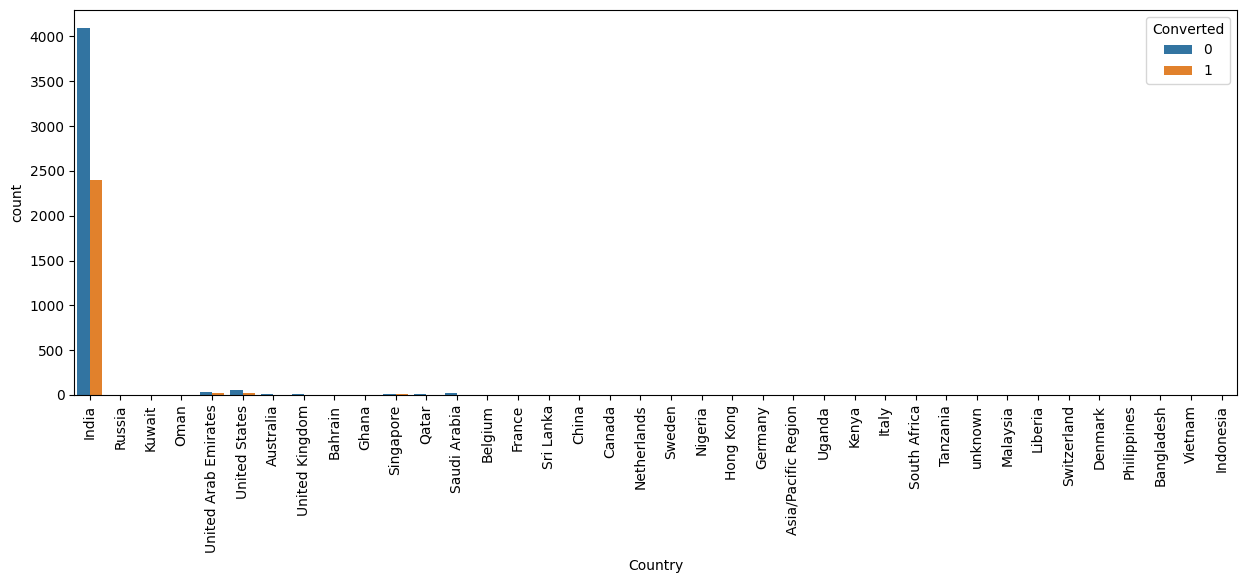

In [1440]:
# For columns wherein the null value percentage is greater than 15%, we will start checking them.
# Let's start analysing country

value_count_and_plot_graph('Country')

**Insights:**

As we can see that both India and NaN together make up ~96% of the data. This is a highly skewed data and hence this column will not contribute much to the analysis, this column can be dropped.

In [1441]:
col_to_drop = ['Country']

******************************************************************************************** 

Specialization
NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.4329

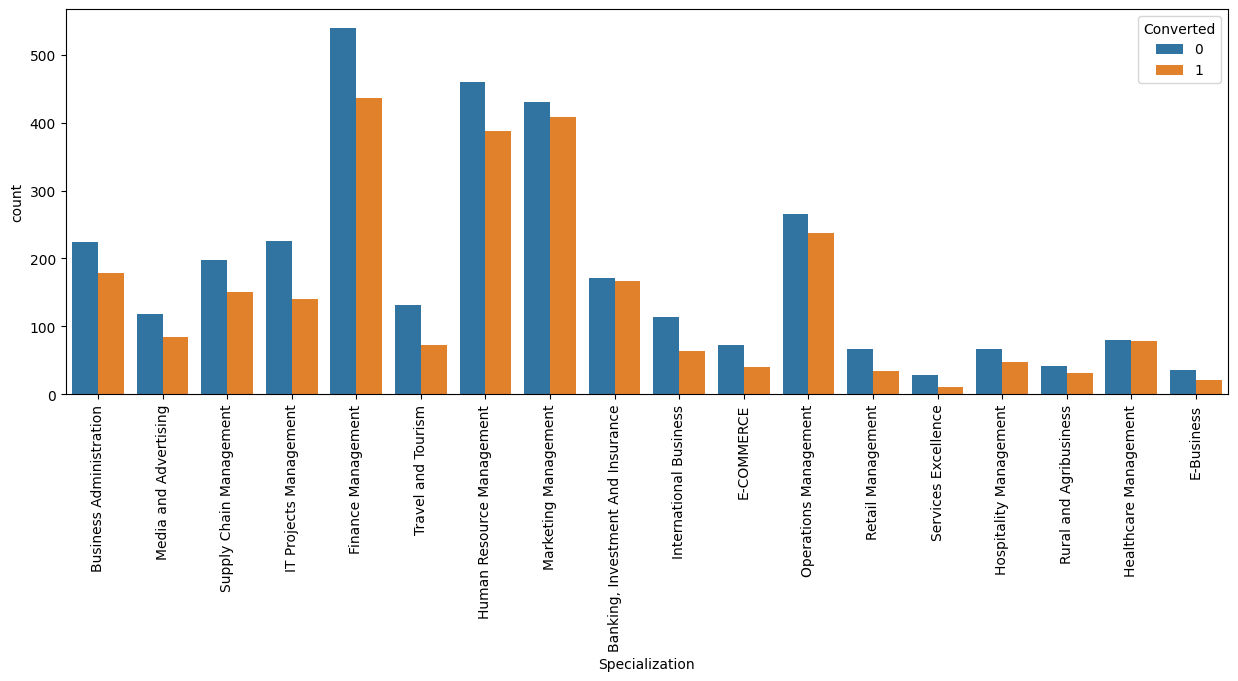

In [1442]:
# Let's check the column 'Specialization'
value_count_and_plot_graph('Specialization')

**Insights**:
* We can see that management leads are higher in number. They are also among the most converted ones
  

In [1443]:
mode = lead_df['Specialization'].mode()
mode

0    Finance Management
Name: Specialization, dtype: object

In [1444]:
# Let's replace the NaN with the mode i,e Marketing Specialization
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'Marketing Specialization')

In [1445]:
# Let's categorize the specilization into three broad categories

# Combining  Management Speciliazations:
lead_df['Specialization'] = lead_df['Specialization'].replace(
    ['Finance Management', 'Human Resource Management', 'Marketing Management', 
     'Operations Management', 'IT Projects Management', 'Supply Chain Management', 
     'Healthcare Management', 'Hospitality Management', 'Retail Management'], 
    'Marketing Specialization')

# Combining Administration Specializations
lead_df['Specialization'] = lead_df['Specialization'].replace(
    ['Business Administration', 'International Business', 'Rural and Agribusiness', 
     'E-Business'], 'Administration Specialization')

# Combining Industry Specializations
lead_df['Specialization'] = lead_df['Specialization'].replace(
    ['Banking, Investment And Insurance', 'Travel and Tourism', 
     'Media and Advertising', 'E-COMMERCE', 'Services Excellence'], 'Industry Specialization')

******************************************************************************************** 

Specialization
Marketing Specialization         82.608225
Industry Specialization           9.696970
Administration Specialization     7.694805
Name: proportion, dtype: float64 



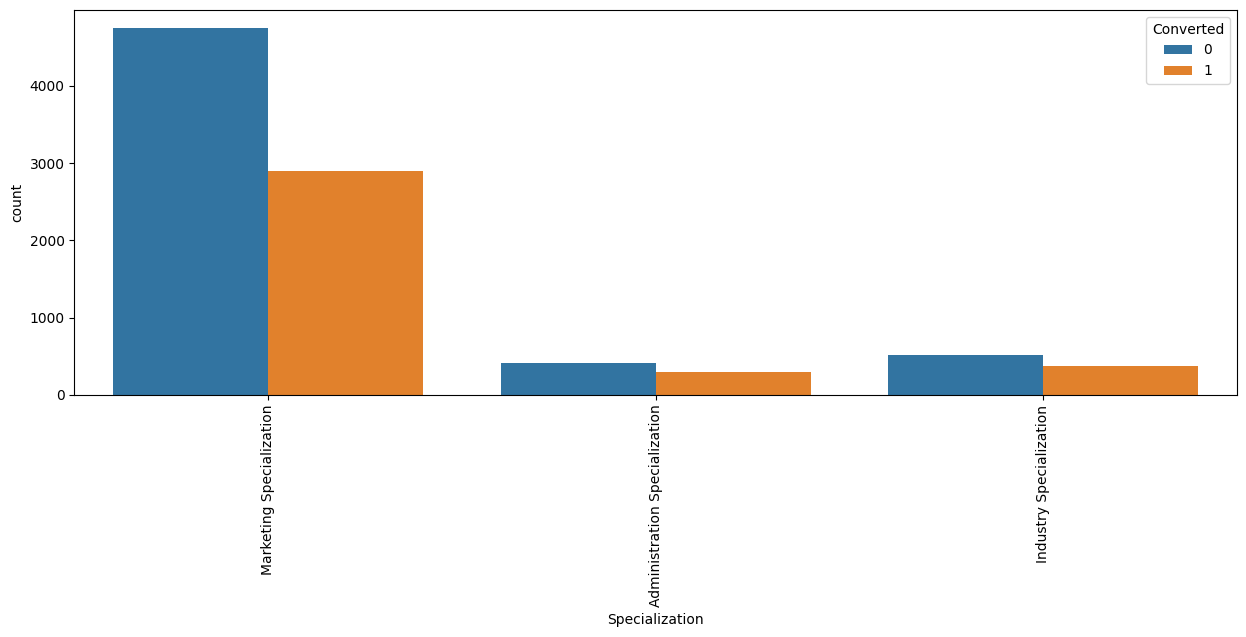

In [1446]:
# Let's check the column 'Specialization' after combining the specializations
value_count_and_plot_graph('Specialization')

******************************************************************************************** 

What is your current occupation
Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64 



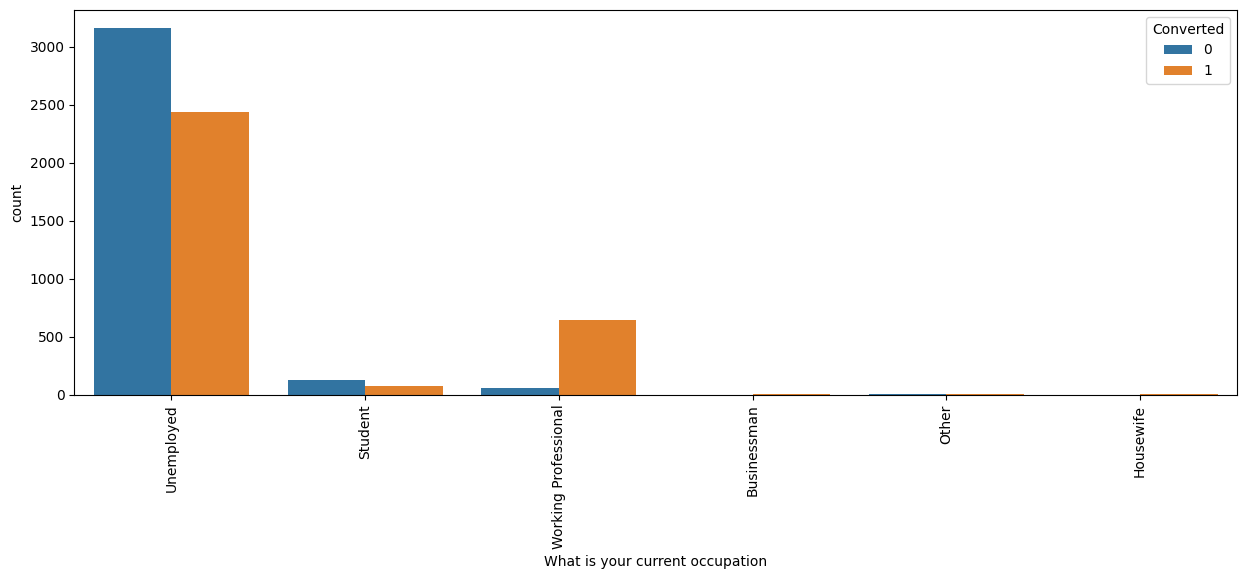

In [1447]:
# Let's check the column 'How did you hear about X Education'
value_count_and_plot_graph('What is your current occupation')

In [1448]:
mode = lead_df['What is your current occupation'].mode()
mode

0    Unemployed
Name: What is your current occupation, dtype: object

In [1449]:
# Let's impute the NaN values with the mode i.e 'Unemployed'

lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

******************************************************************************************** 

What is your current occupation
Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64 



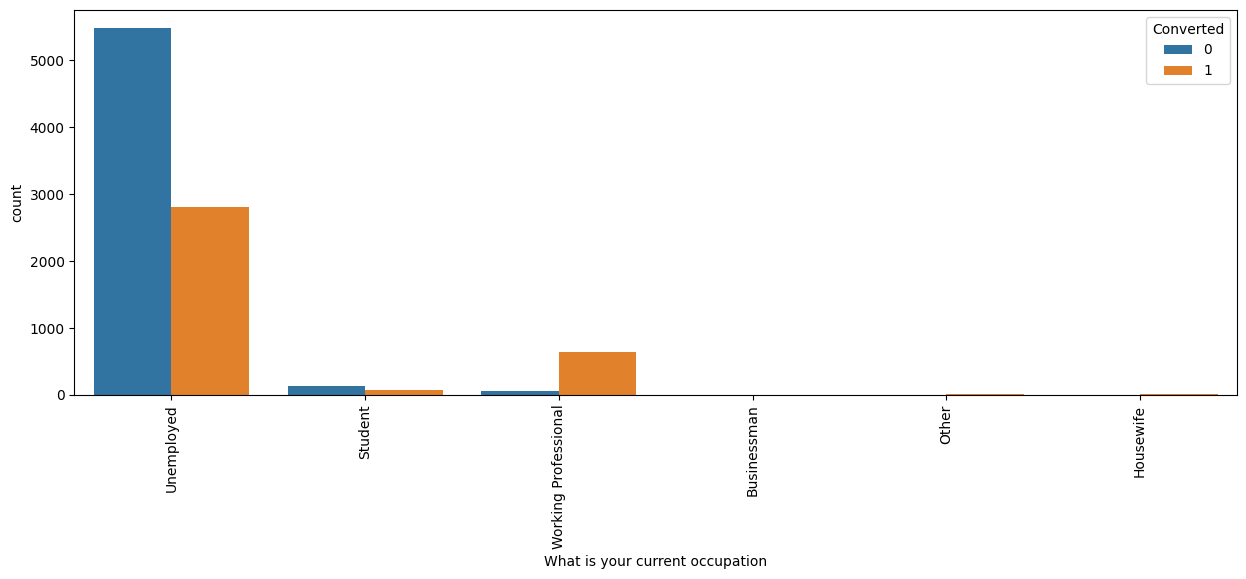

In [1450]:
# Let's check the value count and countplot after imputation
value_count_and_plot_graph('What is your current occupation')

**Insights**:
* 'Unemployed' leads has the highest count
* 'Working Professional' leads have the highest chance of joining the course

******************************************************************************************** 

What matters most to you in choosing a course
Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64 



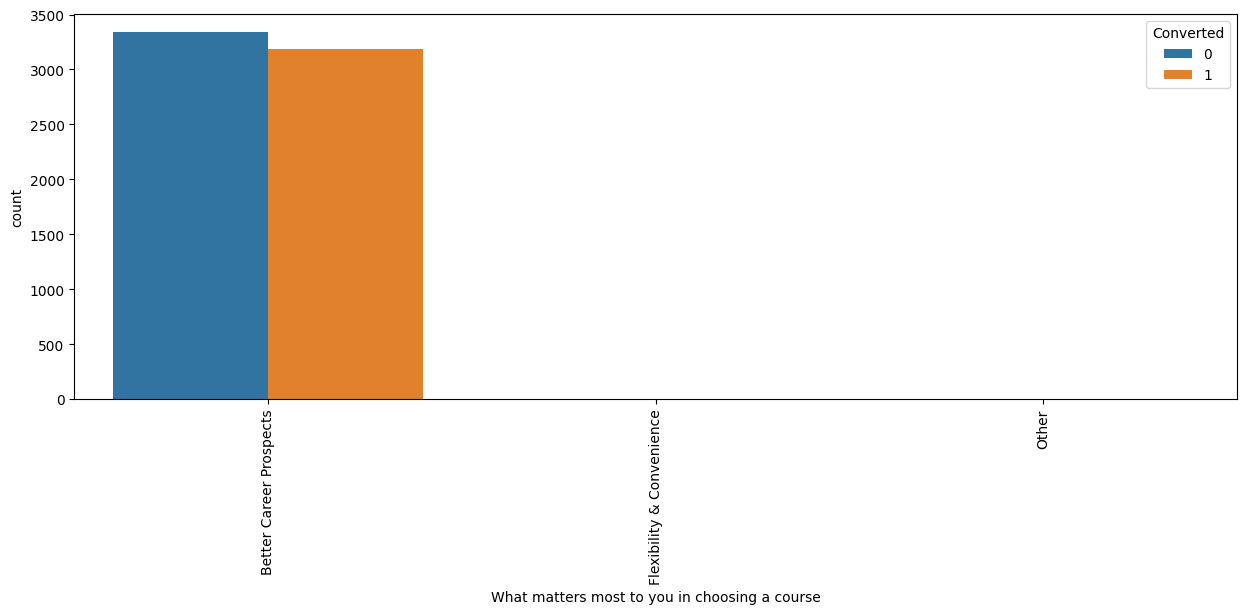

In [1451]:
# Let's check the column 'What matters most to you in choosing a course'
value_count_and_plot_graph('What matters most to you in choosing a course')

In [1452]:
# Let's check the mode for column 'What matters most to you in choosing a course'
mode = lead_df['What matters most to you in choosing a course'].mode()
print(mode)

0    Better Career Prospects
Name: What matters most to you in choosing a course, dtype: object


In [1453]:
# Let's impute NaN with the mode of the column
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

******************************************************************************************** 

What matters most to you in choosing a course
Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64 



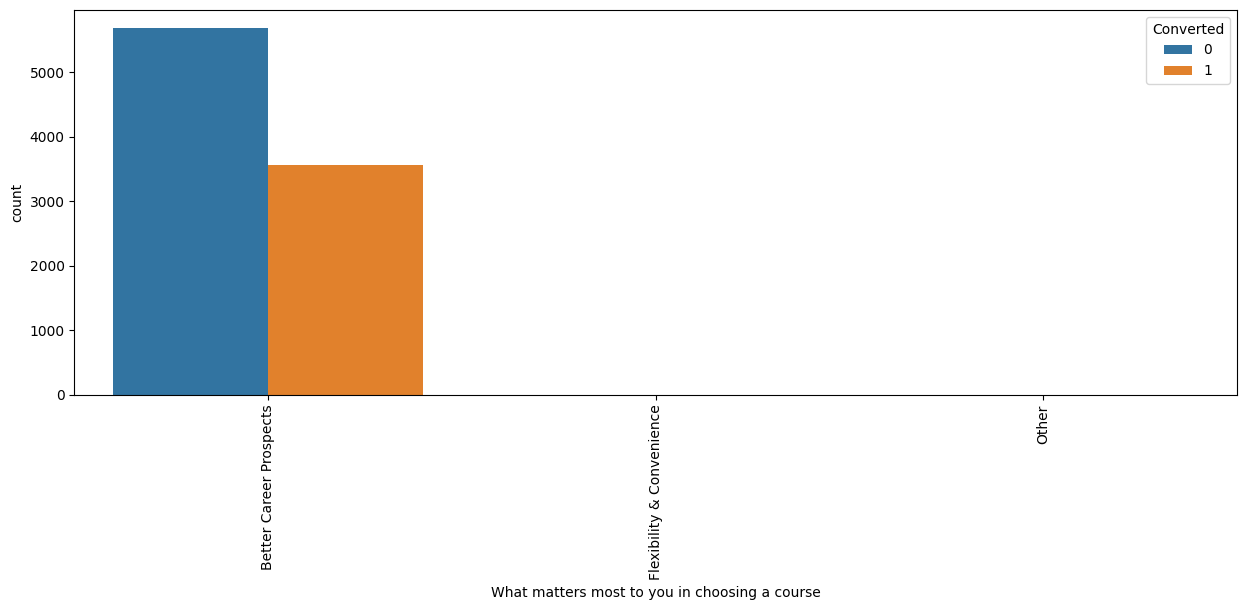

In [1454]:
# Let's check the value count and countplot after imputation
value_count_and_plot_graph('What matters most to you in choosing a course')

**Insights:**

As we can see that 'Better Career Prospects' make up ~99.9% of the data. This is a highly skewed data and hence this column will not contribute much to the analysis, this column can be dropped. We'll be adding to the columns to be dropped list.

In [1455]:
# Appending 'What matters most to you in choosing a course' column to columns to be dropped list
col_to_drop.append('What matters most to you in choosing a course')

******************************************************************************************** 

Tags
NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given

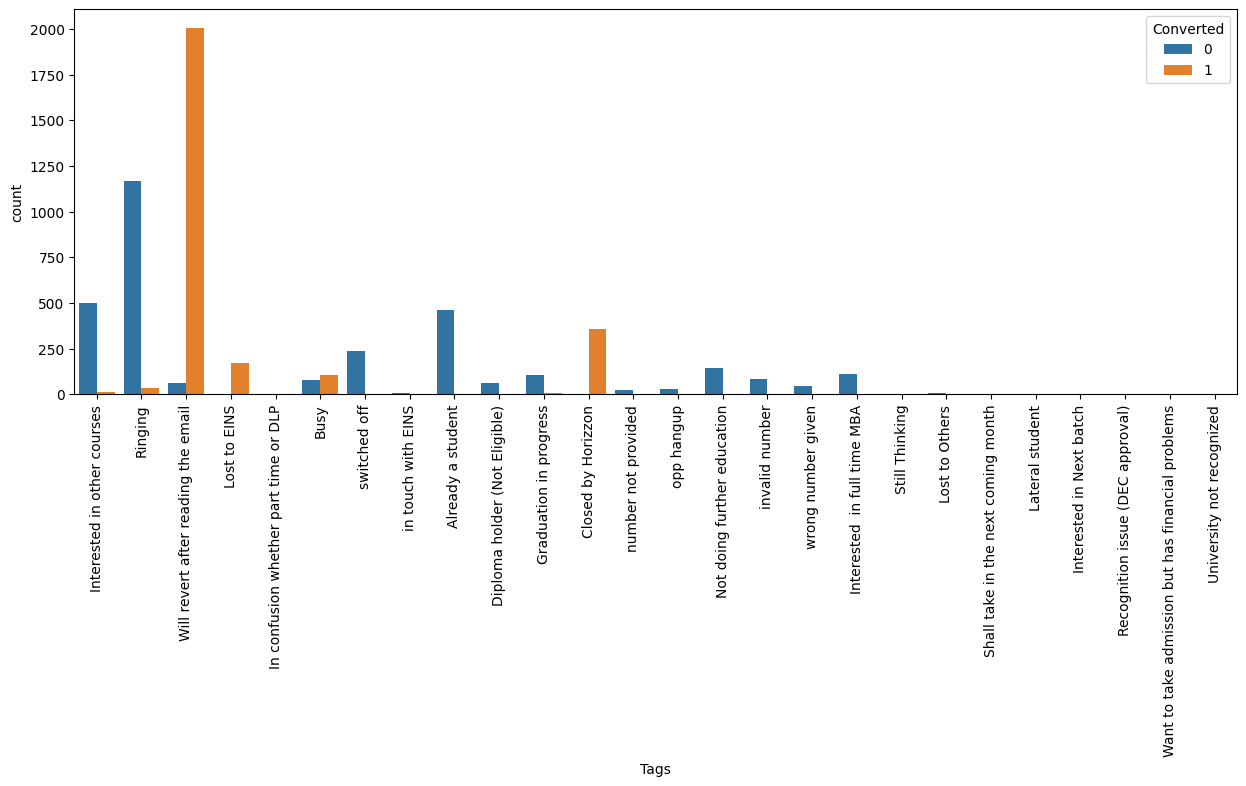

In [1456]:
# Let's check the column 'Tags'
value_count_and_plot_graph('Tags')

In [1457]:
# Let's imput the NaN with 'Not Specified'
lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'Not Specified')

******************************************************************************************** 

Tags
Not Specified                                        36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given

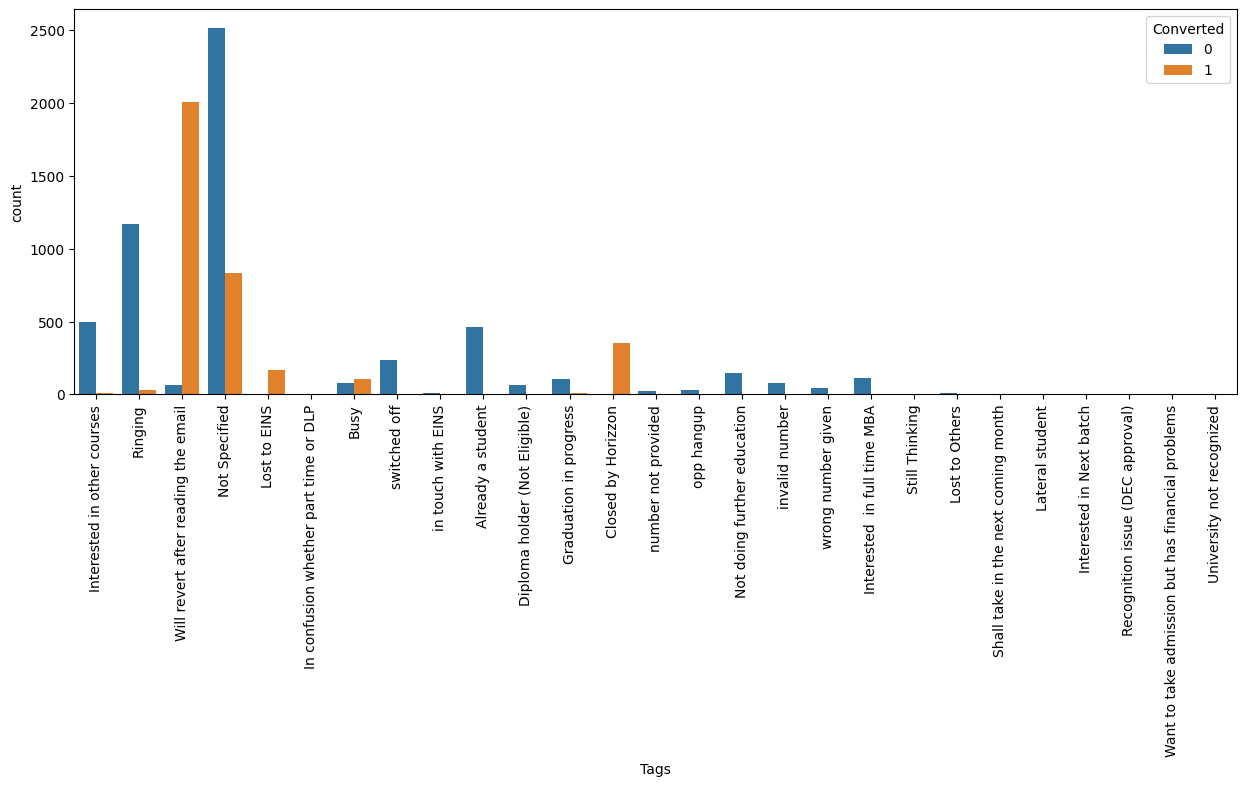

In [1458]:
# Let's check the value count and plot again
value_count_and_plot_graph('Tags')

In [1459]:
# Let's add all low value count tags to a single tag 'Others'
lead_df['Tags'] = lead_df['Tags'].replace(
    ['Interested in other courses', 'In confusion whether part time or DLP', 
     'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup', 
     'number not provided', 'in touch with EINS', 'Lost to Others', 'Still Thinking', 
     'Want to take admission but has financial problems', 'Interested in Next batch', 
     'Lateral student', 'Shall take in the next coming month', 'University not recognized', 
     'Recognition issue (DEC approval)', 'Already a student', 'switched off', 
     'Not doing further education', 'Interested  in full time MBA', 
     'Graduation in progress'], 'Others')

******************************************************************************************** 

Tags
Not Specified                          36.287879
Will revert after reading the email    22.424242
Others                                 20.487013
Ringing                                13.019481
Closed by Horizzon                      3.874459
Busy                                    2.012987
Lost to EINS                            1.893939
Name: proportion, dtype: float64 



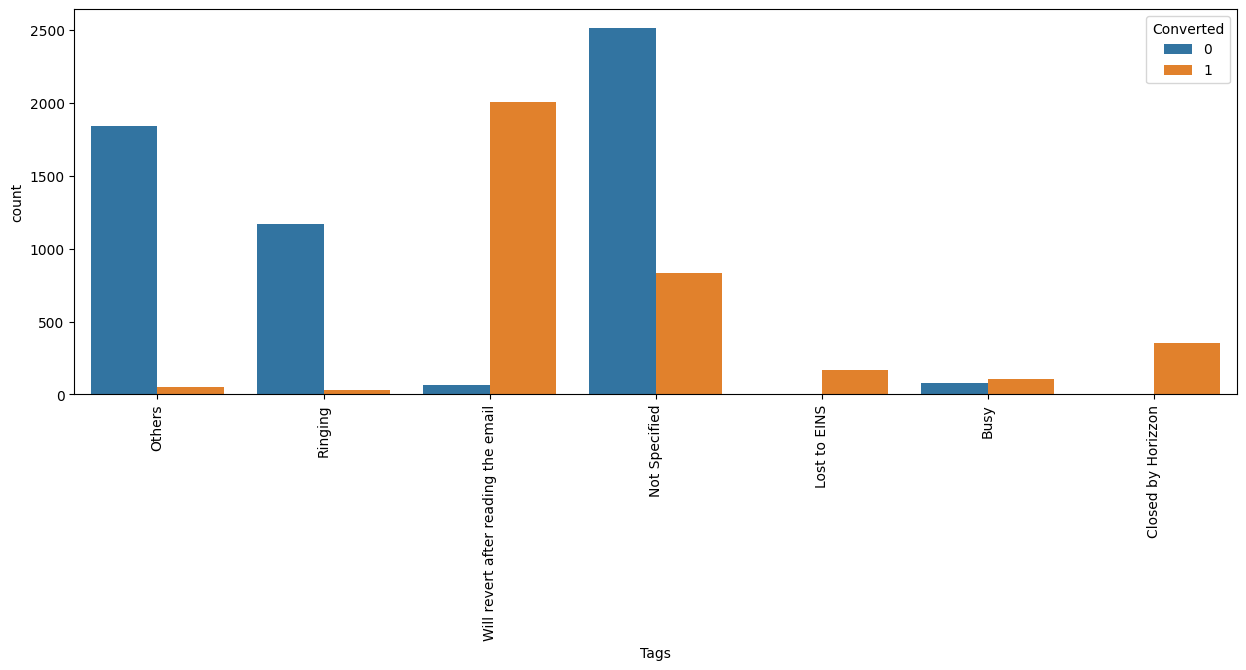

In [1460]:
# Let's check the value counts and countplot after ategorizing the values
value_count_and_plot_graph('Tags')

******************************************************************************************** 

City
NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64 



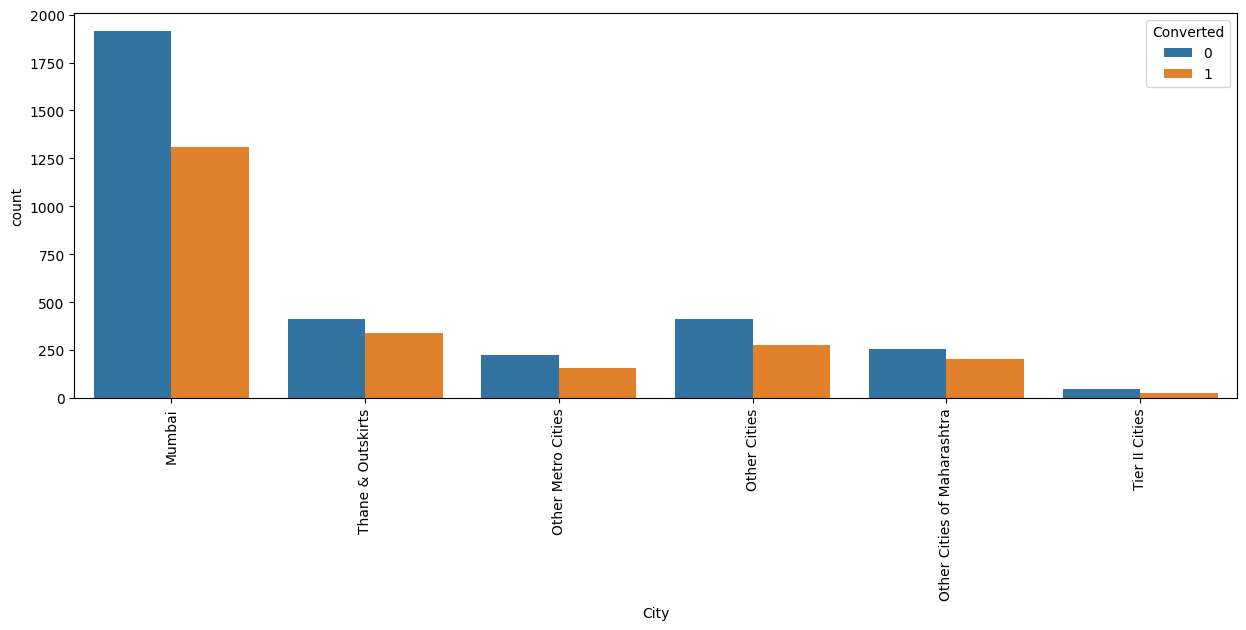

In [1461]:
# Let's check the column 'City'
value_count_and_plot_graph('City')

In [1462]:
# Check mode for 'City' column
mode = lead_df['City'].mode()
mode

0    Mumbai
Name: City, dtype: object

In [1463]:
# Let's replace NaN values in City column with the mode i.e Mumbai
lead_df['City'] = lead_df['City'].replace(np.nan, 'Mumbai')

******************************************************************************************** 

City
Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64 



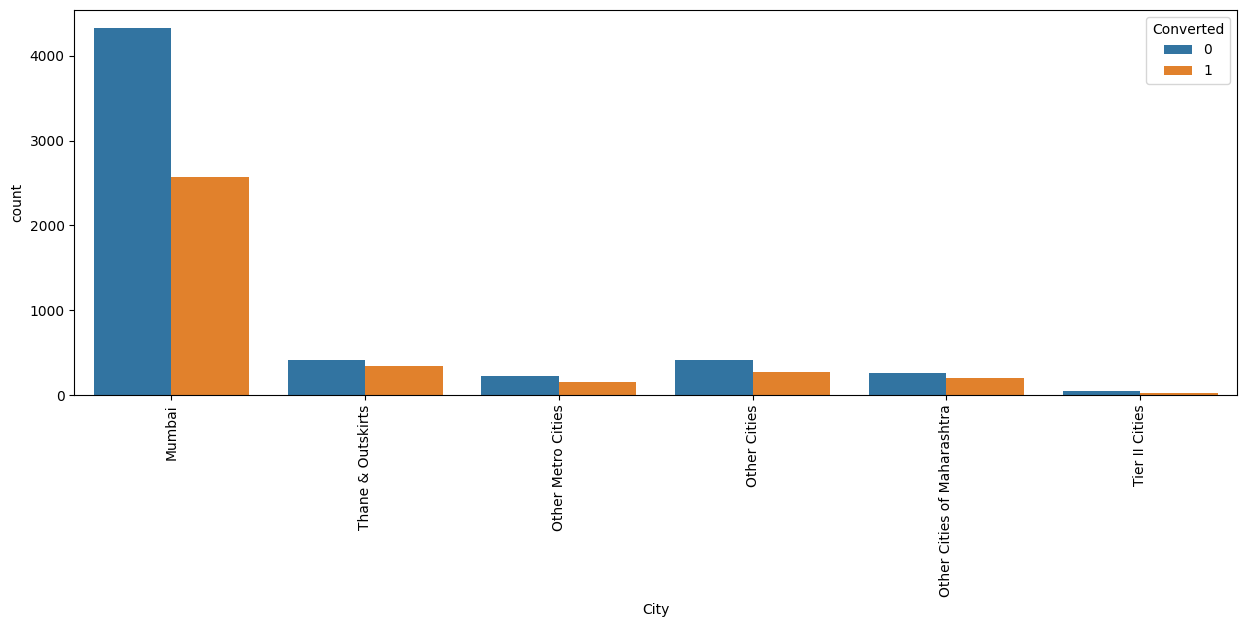

In [1464]:
# Let's check the value count and countplot after imputing the NaN values
value_count_and_plot_graph('City')

**Insights:**
* Highest converted leads is from Mumbai

In [1465]:
# Let's check the null values at this stage
round((lead_df.isnull().sum()/len(lead_df.index))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

******************************************************************************************** 

Lead Source
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64 



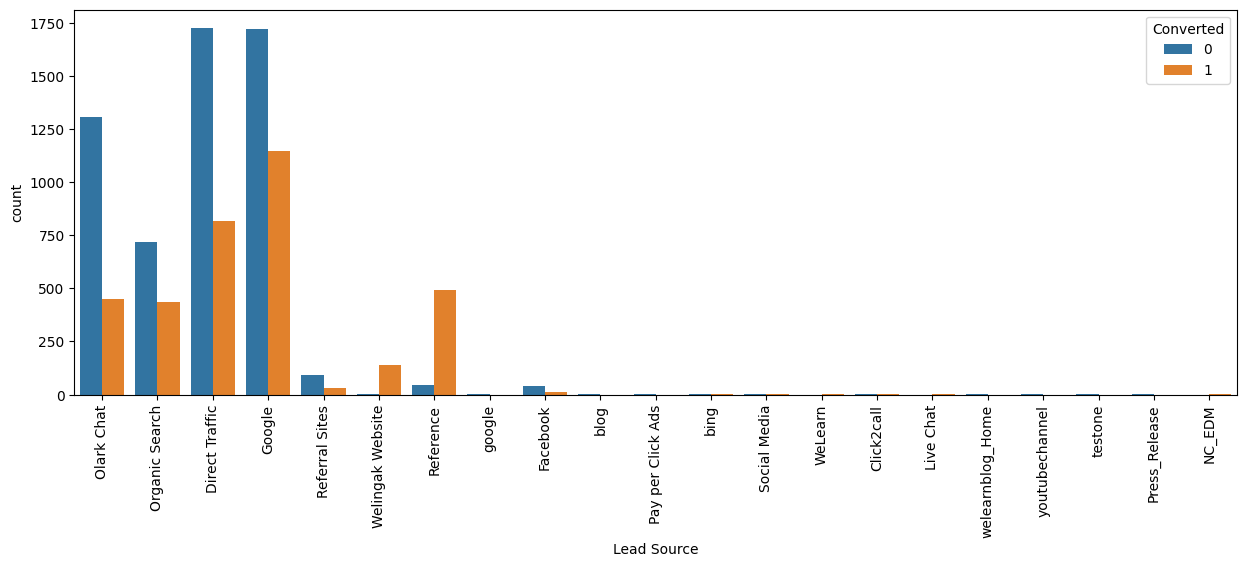

In [1466]:
# Let's check the column 'Lead Source'
value_count_and_plot_graph('Lead Source')

**Insights:**
From the above data we can see that that there are two variations of Google and google. Let's replace google with Google.

In [1467]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google', 'Google')

******************************************************************************************** 

Lead Source
Google               31.093074
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64 



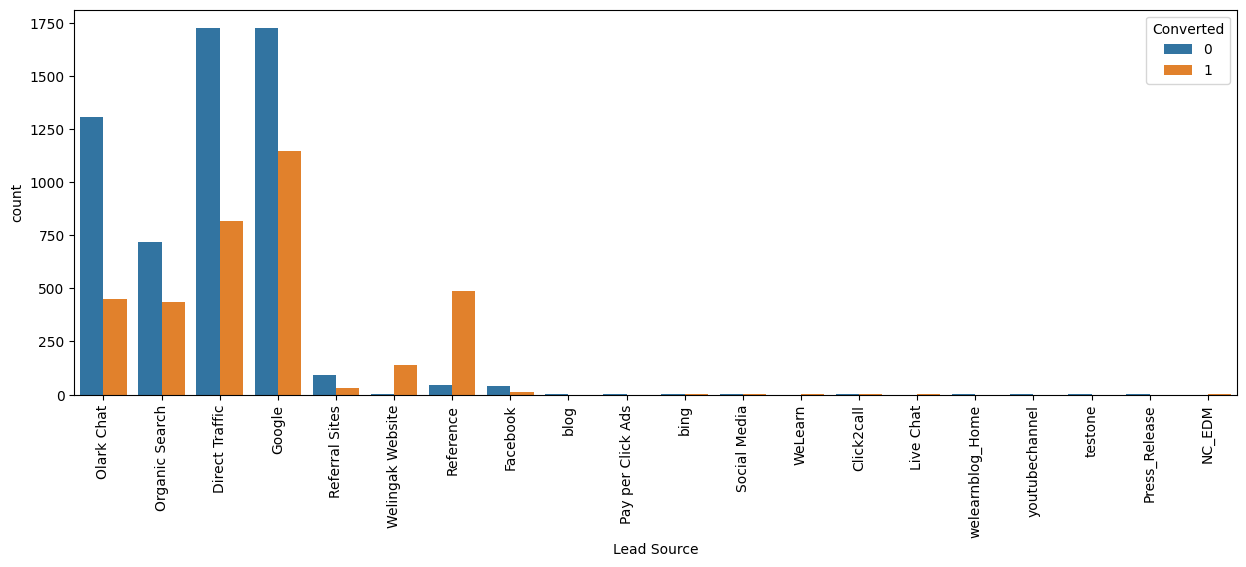

In [1468]:
# Let's check the value count and countplot again
value_count_and_plot_graph('Lead Source')

In [1469]:
mode = lead_df['Lead Source'].mode()
mode

0    Google
Name: Lead Source, dtype: object

In [1470]:
# Let's impute the missing values with the mode of the column 'Lead Source', i.e Google
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan, 'Google')

******************************************************************************************** 

Lead Source
Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Social Media          0.021645
Live Chat             0.021645
Press_Release         0.021645
Pay per Click Ads     0.010823
blog                  0.010823
WeLearn               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
testone               0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64 



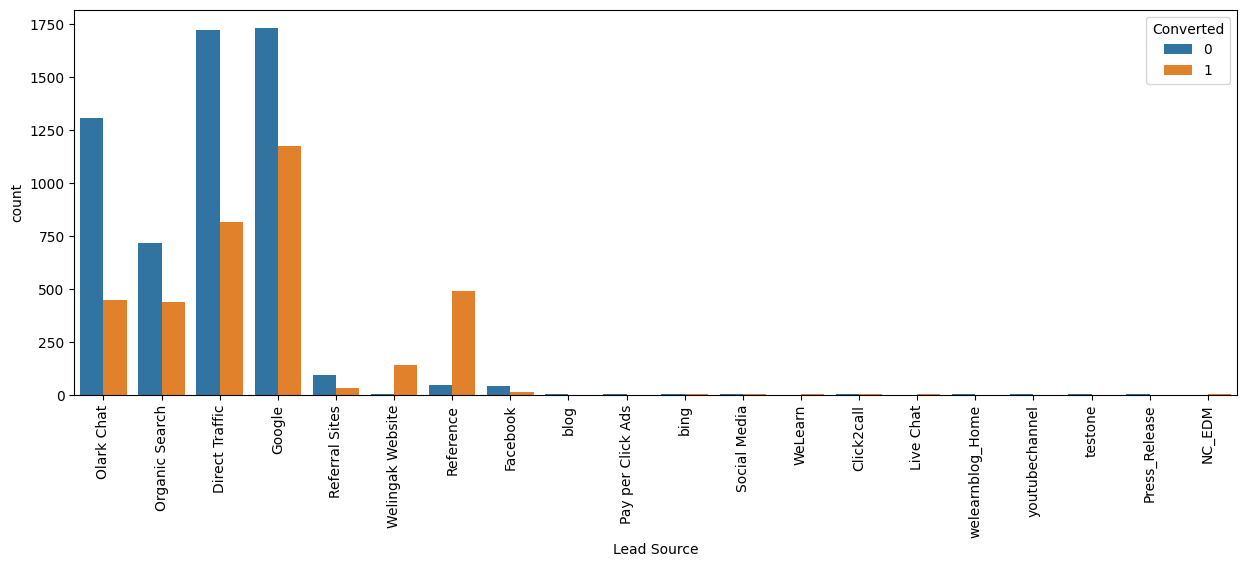

In [1471]:
# Let's check the value count
value_count_and_plot_graph('Lead Source')

In [1472]:
# Let's combine all low frequency value into one single category 'Others'
lead_df['Lead Source'] = lead_df['Lead Source'].replace(
    ['bing', 'Click2call', 'Social Media', 'Live Chat', 'Press_Release', 
     'Pay per Click Ads', 'blog', 'WeLearn', 'welearnblog_Home', 'youtubechannel', 
     'testone', 'NC_EDM'], 'Others')

******************************************************************************************** 

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64 



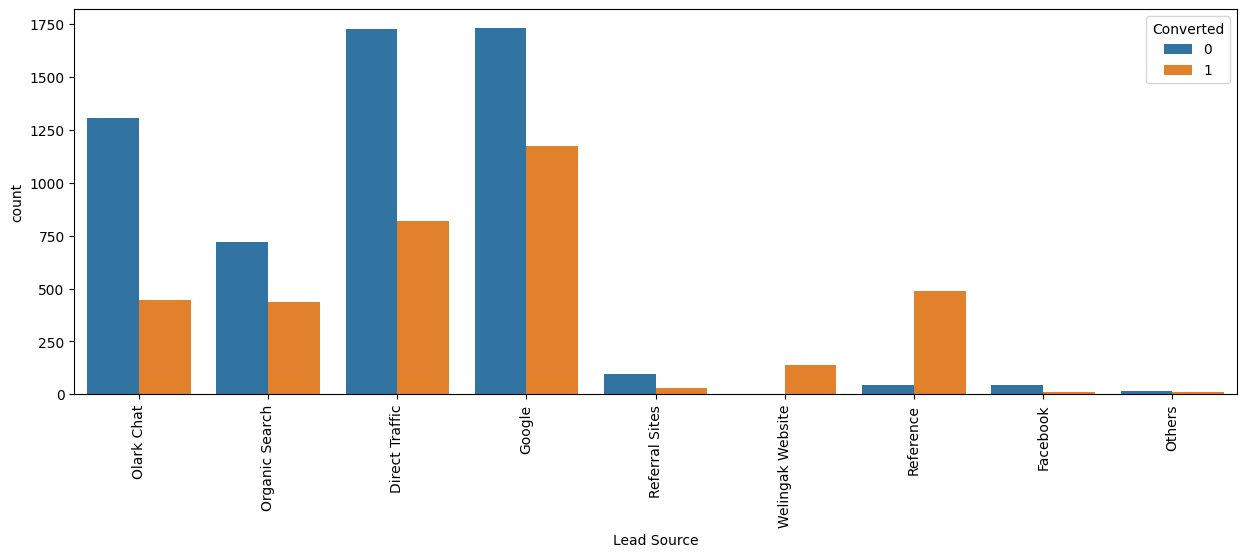

In [1473]:
# Let's check the value count and coumt plt after imputing and creating new category for 'Lead Source'
value_count_and_plot_graph('Lead Source')

**Insights:**

* Conversion Rate of reference leads and welingak website leads is high.
* Google and Direct traffic leads are the one with highest number of leads.
* Lead converion of olark chat, organic search, direct traffic should be improved.

In [1474]:
# Let's check the missing values for the remaining columns
round((lead_df.isnull().sum()/len(lead_df.index))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

The below three columns have ~1% of missing values, let's target then now.
* TotalVisits
* Page Views Per Visit
* Last Activity

******************************************************************************************** 

Last Activity
Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: proportion, dtype: float64 



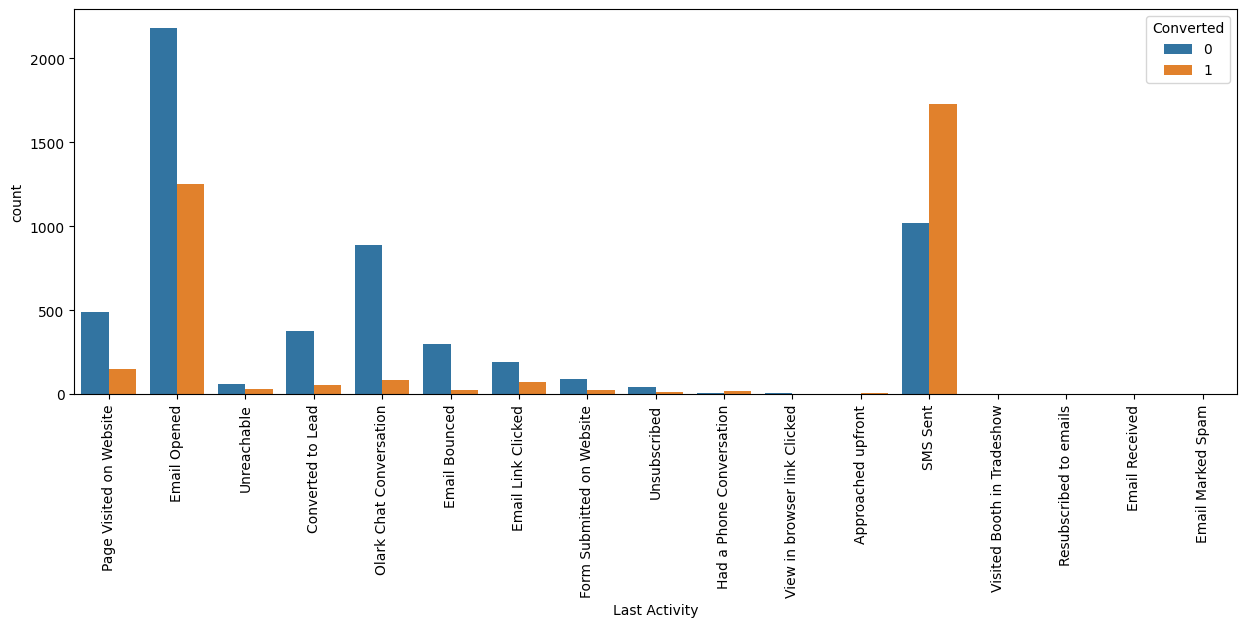

In [1475]:
# Let's check the column 'Last Activity'
value_count_and_plot_graph('Last Activity')

In [1476]:
mode = lead_df['Last Activity'].mode()
mode

0    Email Opened
Name: Last Activity, dtype: object

In [1477]:
#Let's impute missing values with the mode i.e 'Email Opened' and
# categorize all low frequency values to one single category 'Others'.

# Replace NaN with mode
lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan, 'Email Opened')

# Categorize all low frequency values into one single category
lead_df['Last Activity'] = lead_df['Last Activity'].replace(
    ['Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 
     'View in browser link Clicked', 'Email Received', 'Email Marked Spam', 
     'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'Others')

******************************************************************************************** 

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
Others                        1.212121
Unreachable                   1.006494
Name: proportion, dtype: float64 



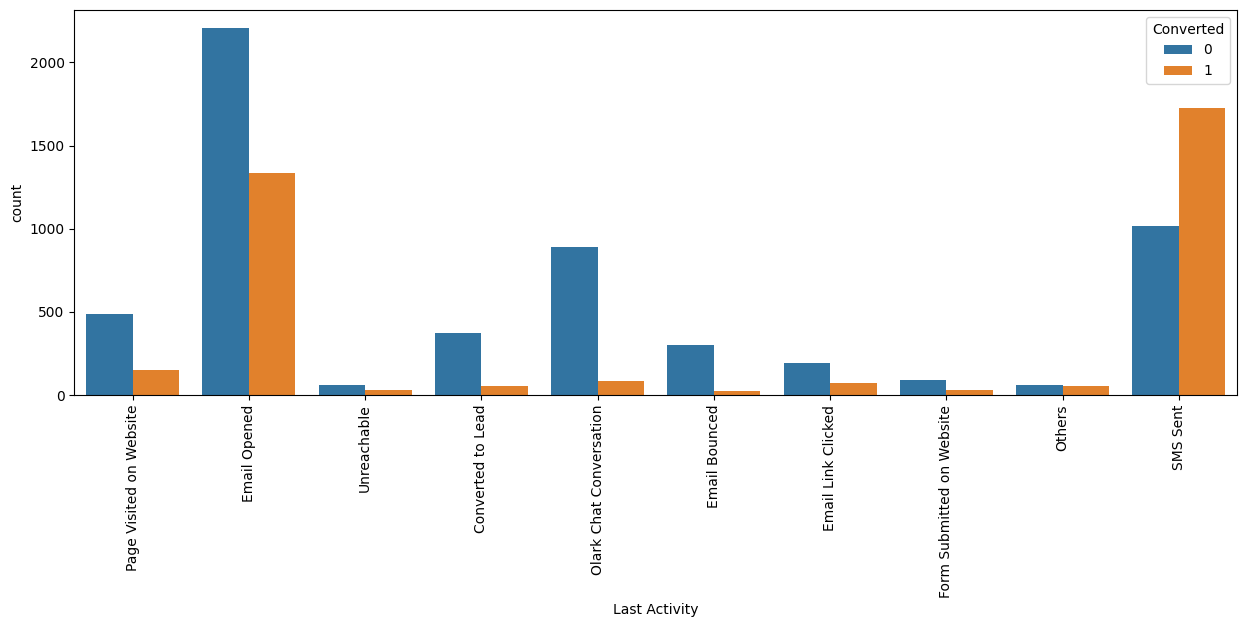

In [1478]:
# Let's chech the value count and visualize it through countplot
value_count_and_plot_graph('Last Activity')

**Insights:**

* 'Email Opened' has a highest number of leads with a good conversion rate.
* Conversion rate for last activity of 'SMS is very high

In [1479]:
# From the above intial Analysis we saw that there were outliers for column 'TotalVisits' and 'Page Views Per Visit'
# Let's start outlier analysis and treatment on these two columns.

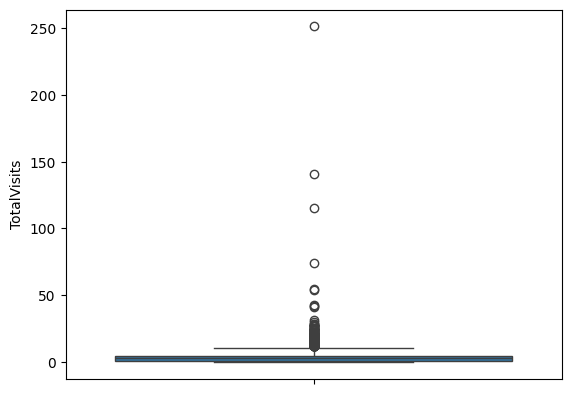

In [1480]:
# Let's check column 'TotalVisits'

sns.boxplot(y=lead_df['TotalVisits'], data=lead_df)
plt.show()

In [1481]:
# Describe the column 'TotalVisits'
lead_df['TotalVisits'].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

**Insights:**
We can see that outliers are present only in the upper range. So we'll treat this outliers.

In [1482]:
# Treating outliers by capping the upper range to 99%
Q3 = lead_df['TotalVisits'].quantile(0.99)

lead_df = lead_df[(lead_df['TotalVisits'] <= Q3)]

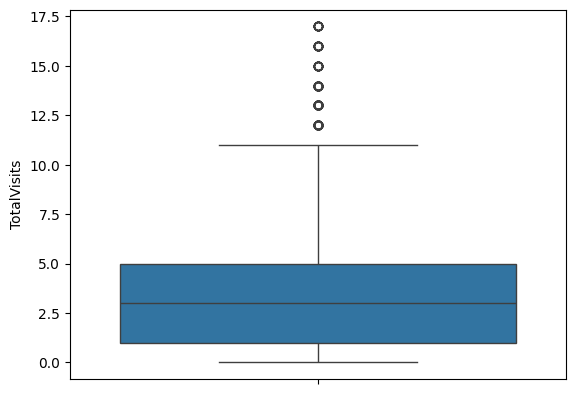

In [1483]:
# Let's check column 'TotalVisits' after removing the outliers

sns.boxplot(y=lead_df['TotalVisits'], data=lead_df)
plt.show()

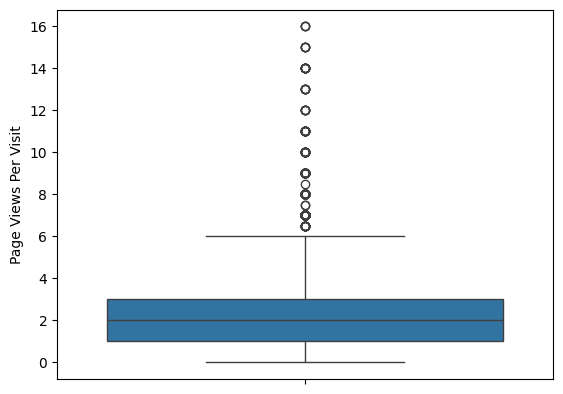

In [1484]:
# Let's check column 'Page Views Per Visit'

sns.boxplot(y=lead_df['Page Views Per Visit'], data=lead_df)
plt.show()

In [1485]:
# Describe the column 'Page Views Per Visit'
lead_df['Page Views Per Visit'].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

**Insights:**
We can see that outliers are present only in the upper range. So we'll treat this outliers.

In [1486]:
# Treating outliers by capping the upper range to 99%
Q3 = lead_df['Page Views Per Visit'].quantile(0.99)

lead_df = lead_df[(lead_df['Page Views Per Visit'] <= Q3)]

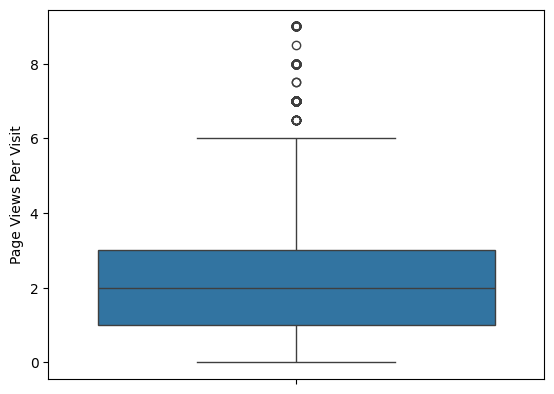

In [1487]:
# Let's check column 'Page Views Per Visit' after removing the outliers

sns.boxplot(y=lead_df['Page Views Per Visit'], data=lead_df)
plt.show()

In [1488]:
# Let's check the null values at this stage
round((lead_df.isnull().sum()/len(lead_df.index))*100, 2) 

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          25.95
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

**Insights:**
At this stage we can see that all null values are handled.
We'll delete the columns Country and Specialization (already added to col_to_drop) later after the complete analysis and cleaning is done.

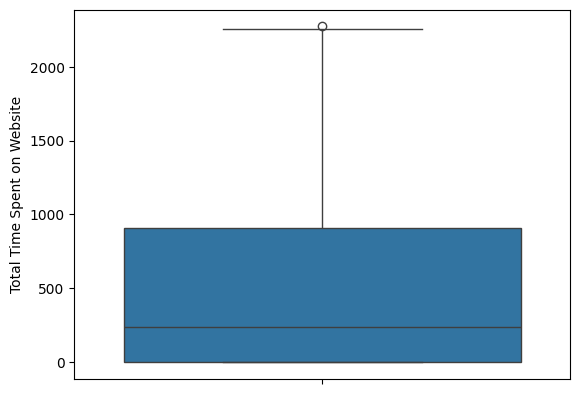

In [1489]:
# Let's check the column 'Total Time Spent on Website'

sns.boxplot(y=lead_df['Total Time Spent on Website'], data=lead_df)
plt.show()

**Insights:**
From the boxplot we can see that no outliers are present, so no treatment is required.

In [1490]:
# Let's check the head and see which column to verify next
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,Others,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


******************************************************************************************** 

Lead Origin
Landing Page Submission    53.267061
API                        39.606836
Lead Add Form               6.779850
Lead Import                 0.346253
Name: proportion, dtype: float64 



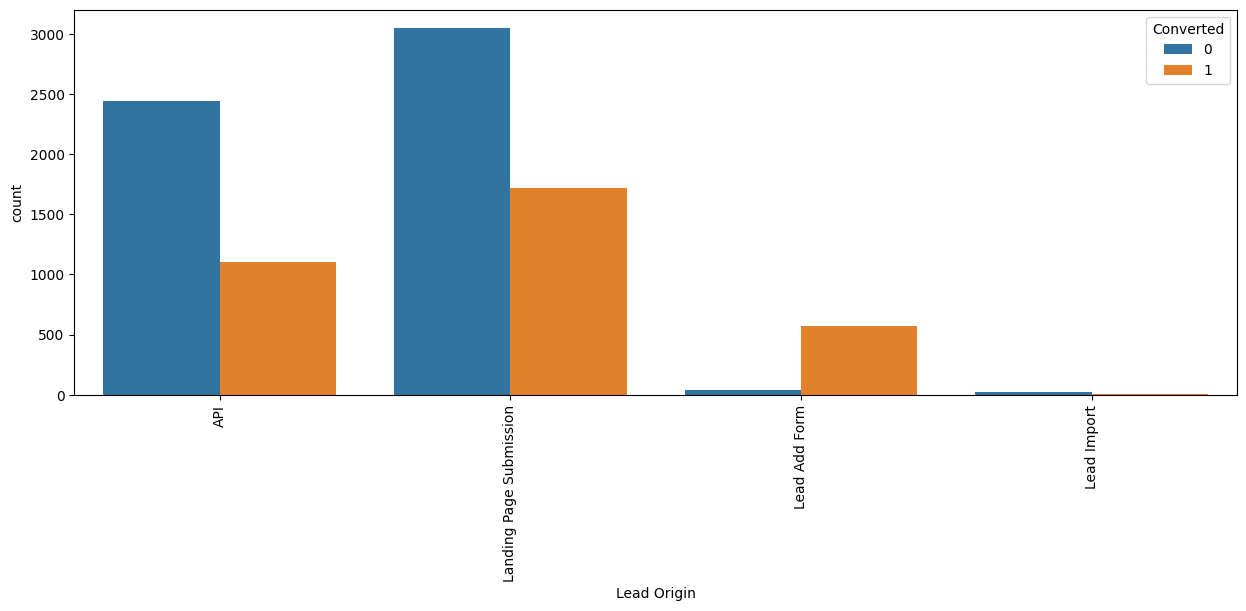

In [1491]:
# Let's check the column 'Lead Origin'
value_count_and_plot_graph('Lead Origin')

**Insights:**

* API and Landing Page Submissing have both high lnumber or leads and conversion rate.
* Lead Add From is doing great with very high conversion rate but the number of leads are less.
* Leads Import have very few leads

**Recommendation:**

In order to improve overall lead conversion rate we need to the below steps:
* Improve lead converion of API and Landing Page Submission origin.
* Generate more leads from Lead Add Form as this has a very high conversion rate.



******************************************************************************************** 

Do Not Email
No     92.2149
Yes     7.7851
Name: proportion, dtype: float64 



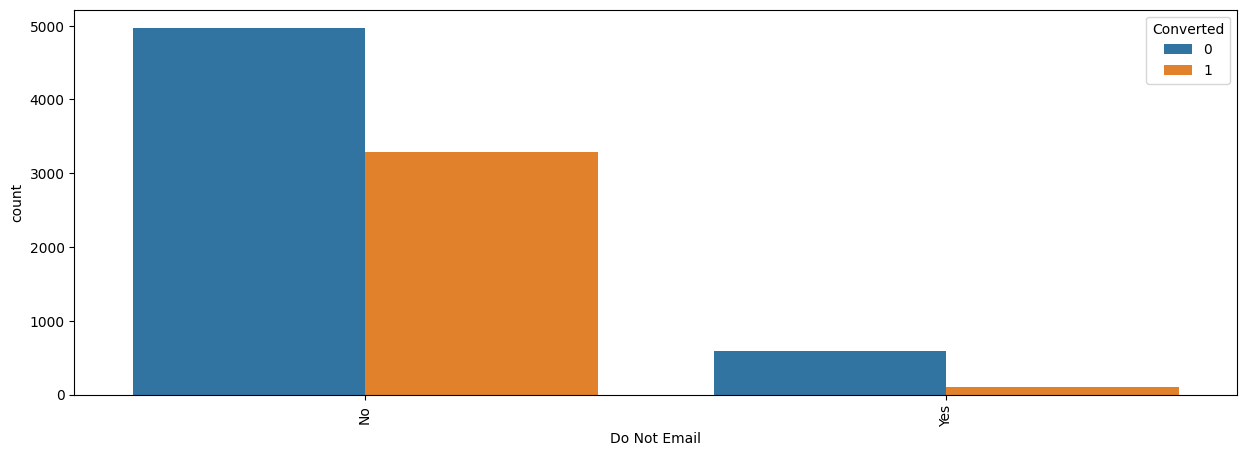

In [1492]:
# Let's check the column 'Do Not Email'
value_count_and_plot_graph('Do Not Email')

******************************************************************************************** 

Do Not Call
No     99.977661
Yes     0.022339
Name: proportion, dtype: float64 



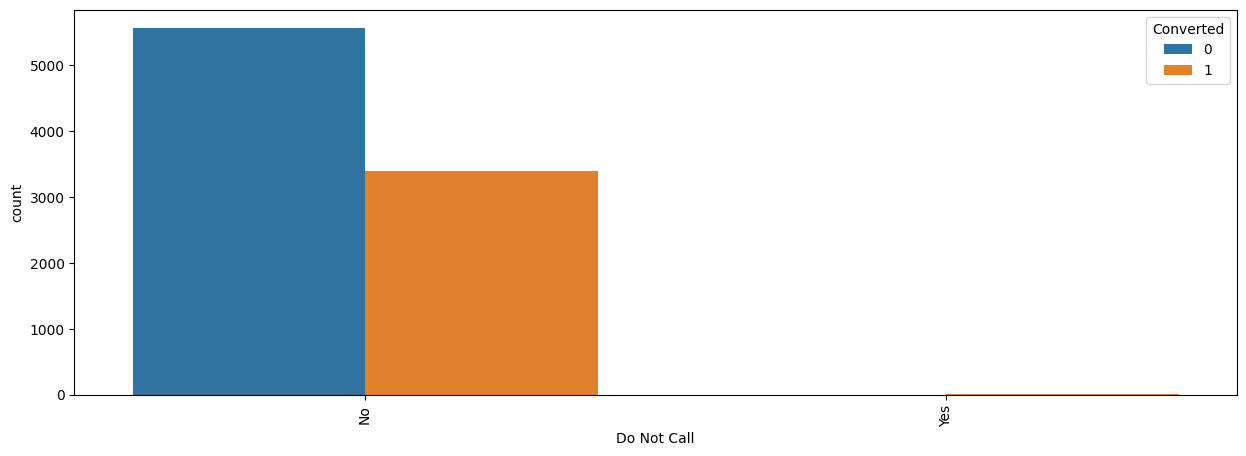

In [1493]:
# Let's check the column 'Do Not Call'
value_count_and_plot_graph('Do Not Call')

**Insights:**
We can see from the value counrt data that 'No' is having more than 99.9% of the data. We can safely drop this column, as this will not add mush to the analysis.

In [1494]:
col_to_drop.append('Do Not Call')
col_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

******************************************************************************************** 

Search
No     99.854797
Yes     0.145203
Name: proportion, dtype: float64 



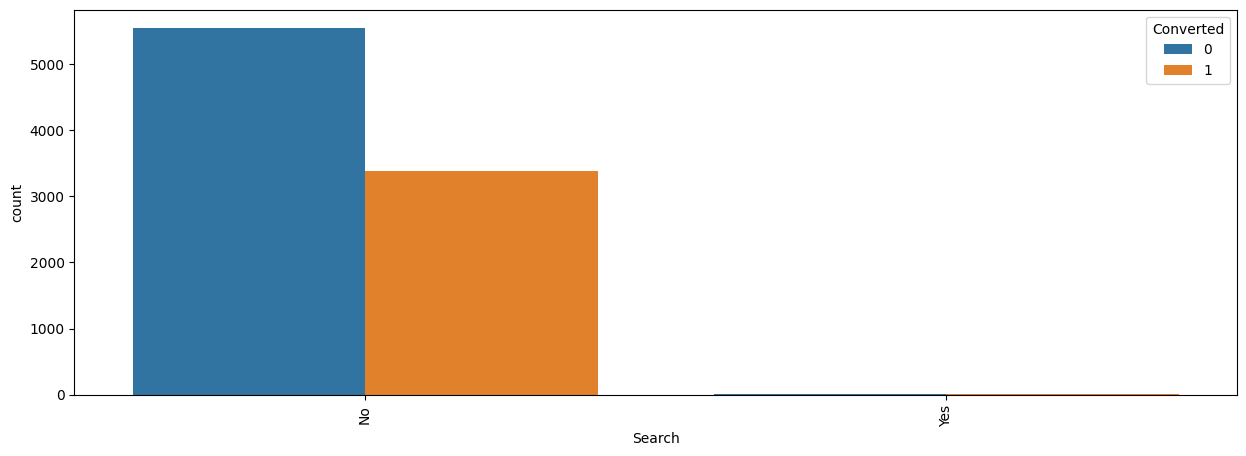

******************************************************************************************** 

Newspaper Article
No     99.988831
Yes     0.011169
Name: proportion, dtype: float64 



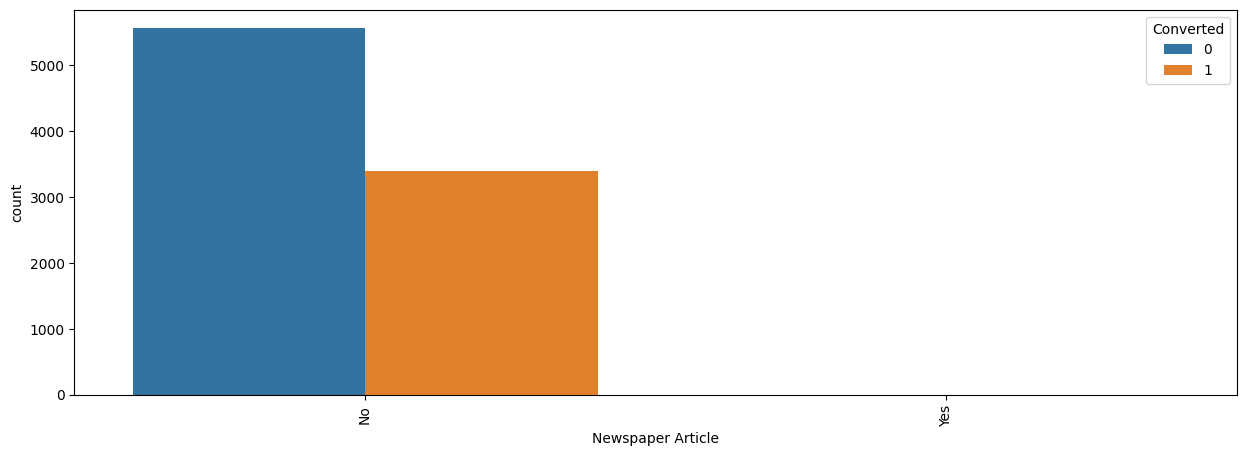

******************************************************************************************** 

X Education Forums
No    100.0
Name: proportion, dtype: float64 



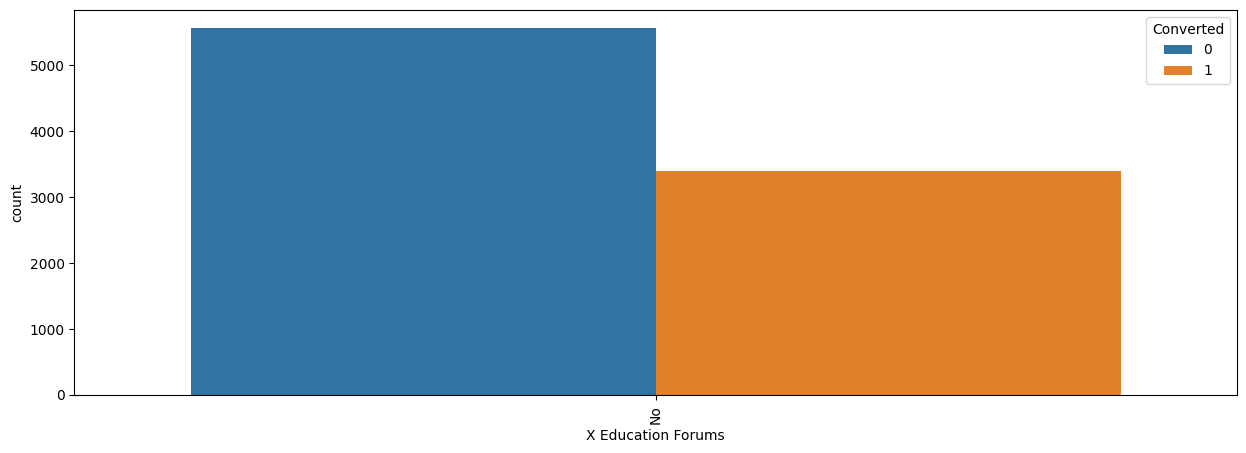

******************************************************************************************** 

Newspaper
No     99.988831
Yes     0.011169
Name: proportion, dtype: float64 



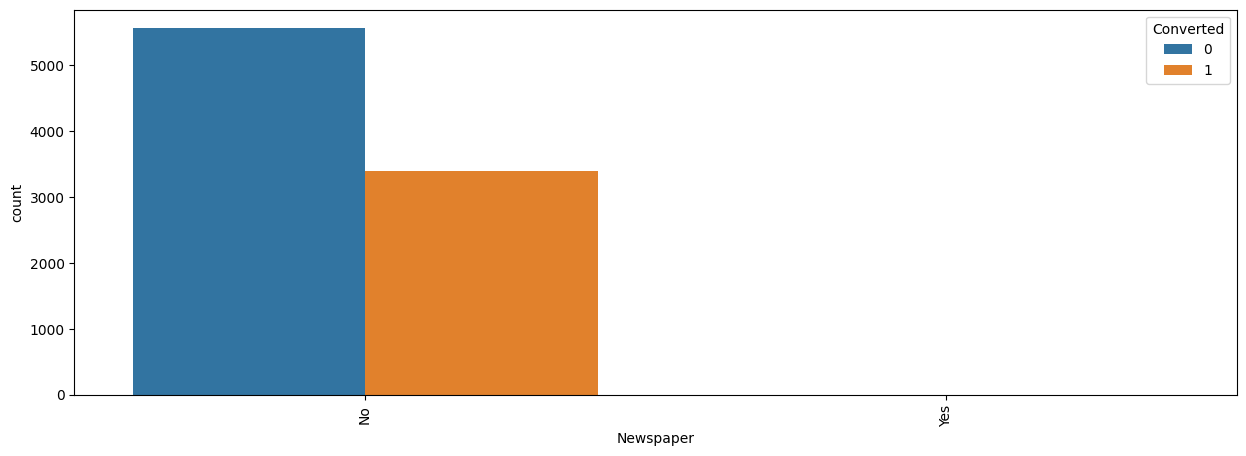

******************************************************************************************** 

Digital Advertisement
No     99.966492
Yes     0.033508
Name: proportion, dtype: float64 



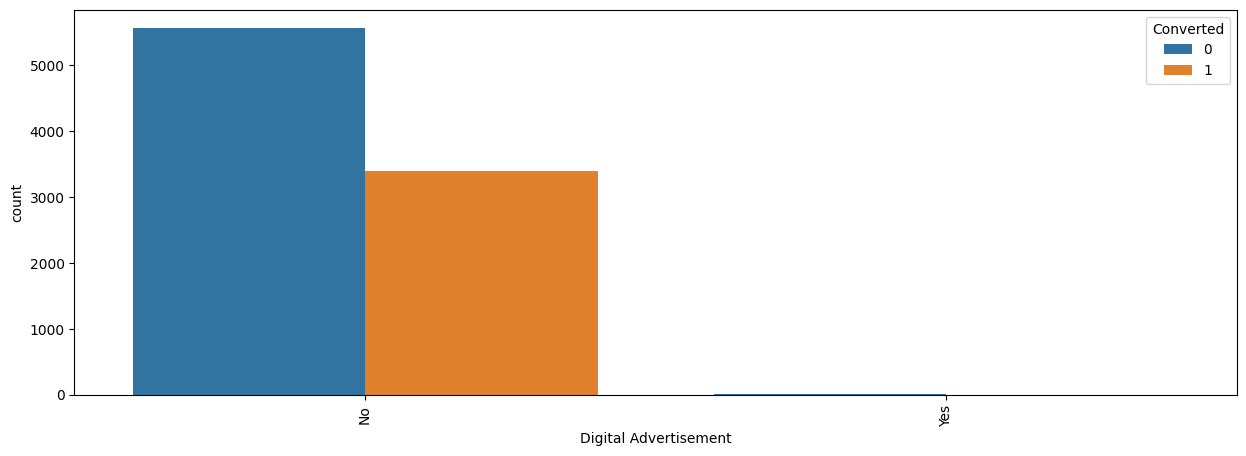

******************************************************************************************** 

Through Recommendations
No     99.932983
Yes     0.067017
Name: proportion, dtype: float64 



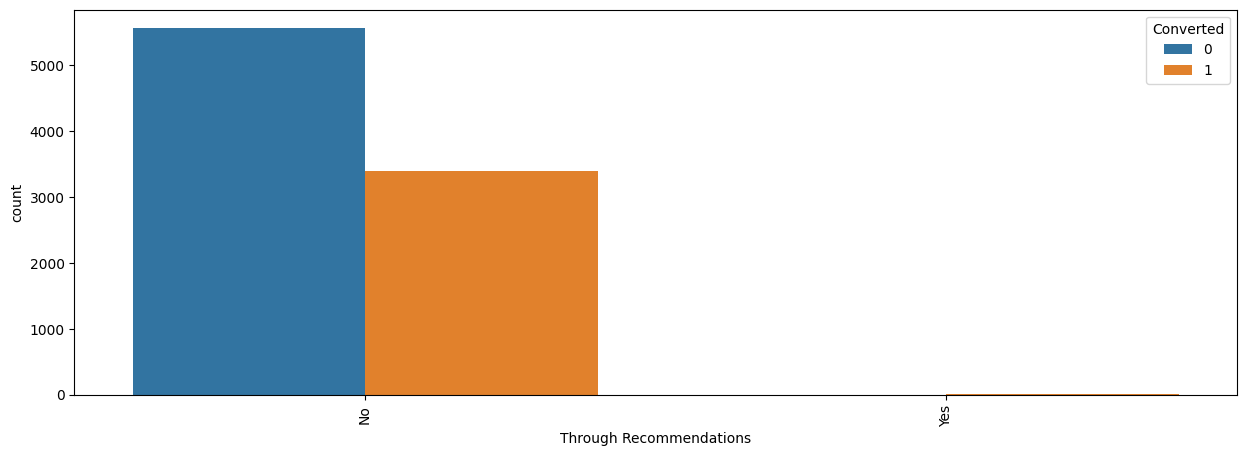

In [1495]:
# Let's check the remaining columns:

cols_to_check = ['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                 'Digital Advertisement', 'Through Recommendations']

for col in cols_to_check:
    value_count_and_plot_graph(col)

**Insights:**
We can see from the value count data that 'No' is having more than 99% of the data. We can safely drop these column, as this will not add much to the analysis.

In [1496]:
col_to_drop.extend(cols_to_check)
col_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [1497]:
lead_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

******************************************************************************************** 

A free copy of Mastering The Interview
No     68.747906
Yes    31.252094
Name: proportion, dtype: float64 



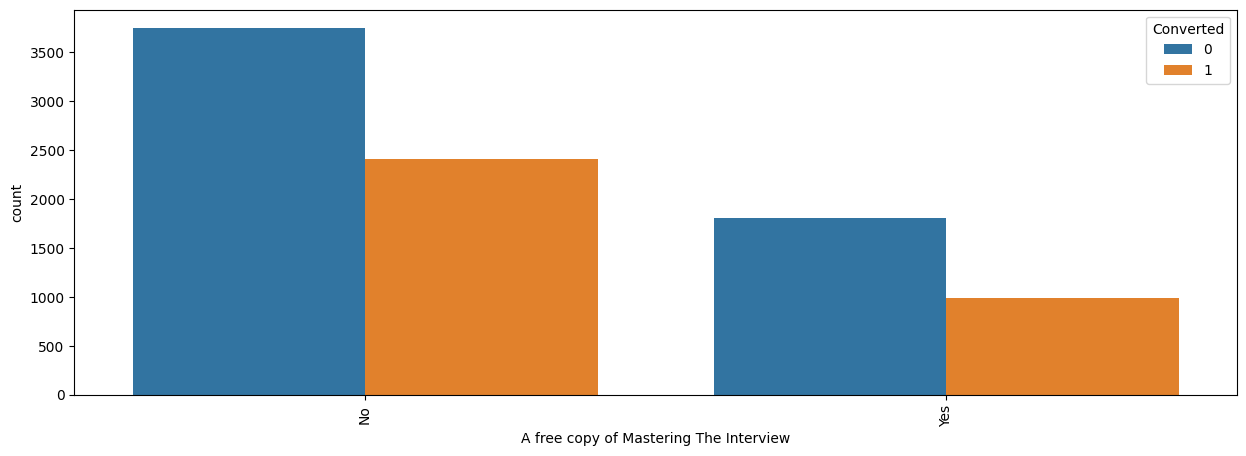

In [1498]:
# Let's check the column 'A free copy of Mastering The Interview'
value_count_and_plot_graph('A free copy of Mastering The Interview')

******************************************************************************************** 

Last Notable Activity
Modified                        36.010276
Email Opened                    31.151569
SMS Sent                        23.936111
Page Visited on Website          3.216799
Olark Chat Conversation          2.032838
Email Link Clicked               1.898805
Email Bounced                    0.658997
Unsubscribed                     0.513794
Unreachable                      0.357422
Had a Phone Conversation         0.145203
Email Marked Spam                0.022339
Approached upfront               0.011169
Resubscribed to emails           0.011169
View in browser link Clicked     0.011169
Form Submitted on Website        0.011169
Email Received                   0.011169
Name: proportion, dtype: float64 



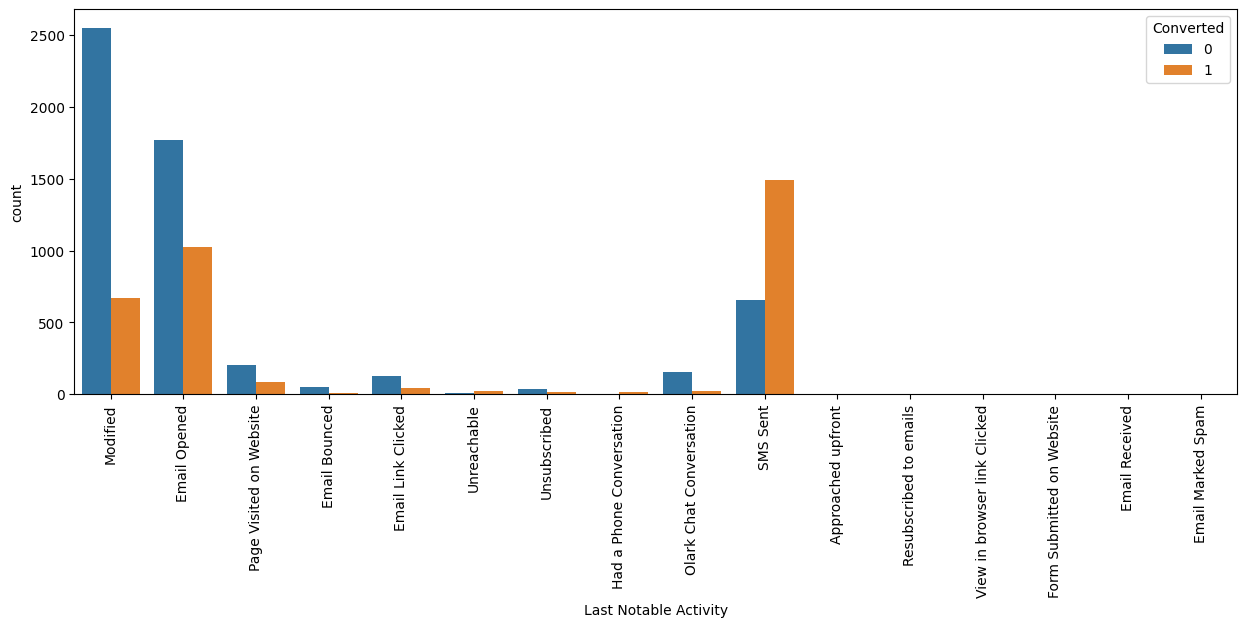

In [1499]:
# Let's check the column 'Last Notable Activity'
value_count_and_plot_graph('Last Notable Activity')

In [1500]:
# Let's categorize low frequency values to a single category 'Others'

lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(
    ['Email Bounced', 'Unsubscribed', 'Unreachable', 'Had a Phone Conversation', 
     'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails', 
     'View in browser link Clicked', 'Form Submitted on Website', 'Email Received'], 'Others')

******************************************************************************************** 

Last Notable Activity
Modified                   36.010276
Email Opened               31.151569
SMS Sent                   23.936111
Page Visited on Website     3.216799
Olark Chat Conversation     2.032838
Email Link Clicked          1.898805
Others                      1.753602
Name: proportion, dtype: float64 



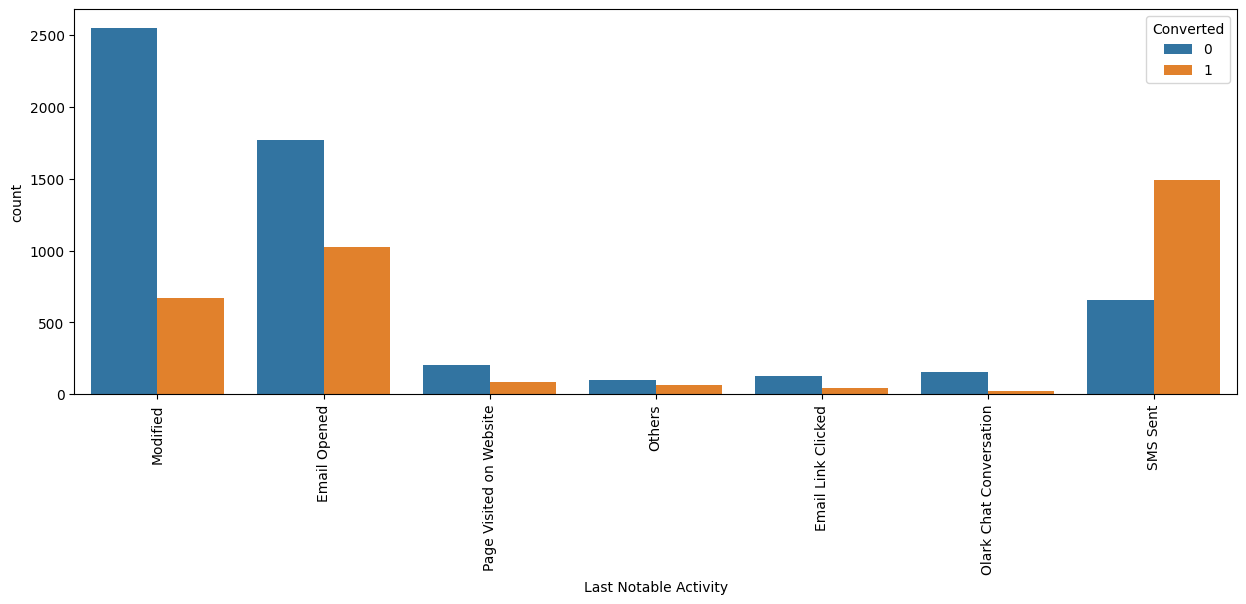

In [1501]:
# Let's check the value count and the corresponding countplot
value_count_and_plot_graph('Last Notable Activity')

In [1502]:
# Let's drop the redundant columns
lead_df.drop(columns=col_to_drop, axis=1, inplace=True)

In [1503]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   object 
 

In [1504]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Marketing Specialization,Unemployed,Others,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Marketing Specialization,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Administration Specialization,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Industry Specialization,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Marketing Specialization,Unemployed,Will revert after reading the email,Mumbai,No,Modified


### NUMERICAL ANALYSIS

In [1505]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Marketing Specialization,Unemployed,Others,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Marketing Specialization,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Administration Specialization,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Industry Specialization,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Marketing Specialization,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [1506]:
# Let's check the percent of data that has converted value

converted = sum(lead_df['Converted'])/len(lead_df['Converted'])*100
converted

37.92025019546521

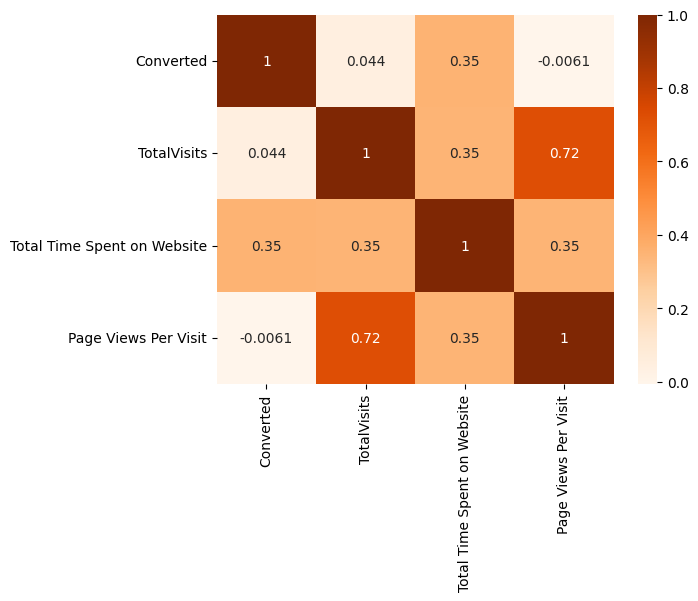

In [1507]:
# Let's check the correlation between the numerical columns

sns.heatmap(lead_df.corr(numeric_only=True), cmap='Oranges', annot=True)
plt.show()

**Insights:**
* 'TotalVisits' and 'Page Views Per Visit' have a high correlation index of 0.72
* 'Total Time Spent on Website' has a correlation index of 0.35 with target variable 'Converted'
* All other numnerical columns have low correlation with target variable 'Converted'

# Let's check the data distribution of the numerical columns with the target variable 'Converted'

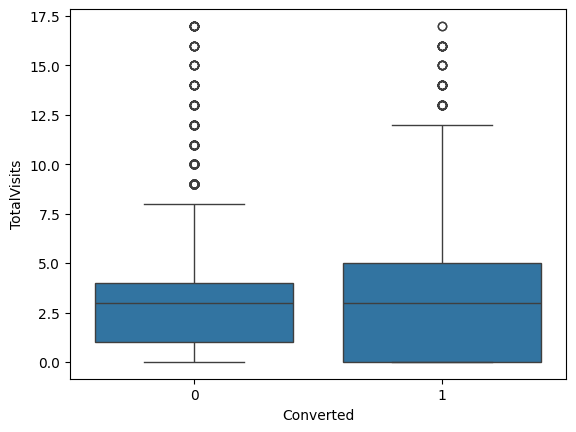

In [1508]:
# Plot a graph of 'TotalVisits' Vs 'Converted'
sns.boxplot(x='Converted', y='TotalVisits', data=lead_df)
plt.show()

**Insights:**
* From the above boxplot we can see that the median for both converted and not converted leads are the same.

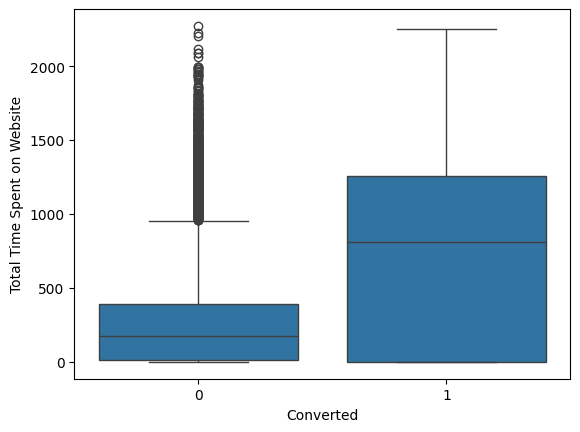

In [1509]:
# Plot a graph of 'Total Time Spent on Website' Vs 'Coverted'

sns.boxplot(x='Converted', y='Total Time Spent on Website', data=lead_df)
plt.show()

**Insights:**
* From the above boxplot we can see that the leads spending more time on the website are more likely to opt for the courses

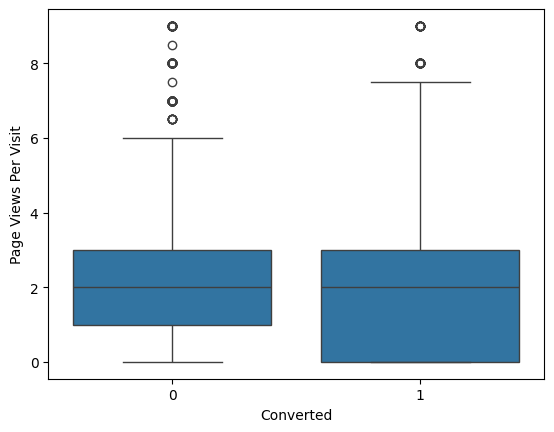

In [1510]:
# Plot graph of 'Page Views Per Visit' Vs 'Converted'
sns.boxplot(x='Converted', y='Page Views Per Visit', data=lead_df)
plt.show()

**Insights:**
From the above boxplot we can see that the median for both converted and not converted are the same.

### DATA PRE-PROCESSING

In [1511]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Marketing Specialization,Unemployed,Others,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Marketing Specialization,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Administration Specialization,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Industry Specialization,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Marketing Specialization,Unemployed,Will revert after reading the email,Mumbai,No,Modified


#### Converting Binary Variables:

In [1512]:
# From the above table we can see that 'Do Not Email' and 'A free copy of Mastering The Interview' 
# are binary columns and these should be converted to 0/1

binary_cols = ['Do Not Email', 'A free copy of Mastering The Interview']

for col in binary_cols:
    lead_df[col] = lead_df[col].map({'Yes': 1, 'No': 0})

In [1513]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Marketing Specialization,Unemployed,Others,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Marketing Specialization,Unemployed,Ringing,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Administration Specialization,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Industry Specialization,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Marketing Specialization,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [1514]:
# Get the list of categorical columns, for dummy variable creation

cat_cols = lead_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

#### Dummy Variable Creation

In [1515]:
# Let's create dummy variables for categorical columns and drop the 
# first column for each category using drop_first=True

dummy = pd.get_dummies(lead_df[cat_cols], drop_first=True, dtype='int')
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1516]:
# Let's concat the dummy dataset with the lead score dataset

lead_df = pd.concat([dummy, lead_df], axis=1)
lead_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,0,0,0,0,0,1,0,0,0,0,...,0.0,0,0.0,Page Visited on Website,Marketing Specialization,Unemployed,Others,Mumbai,0,Modified
1,0,0,0,0,0,0,1,0,0,0,...,5.0,674,2.5,Email Opened,Marketing Specialization,Unemployed,Ringing,Mumbai,0,Email Opened
2,1,0,0,0,0,0,0,0,0,0,...,2.0,1532,2.0,Email Opened,Administration Specialization,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,1,0,0,0,0,0,0,0,0,0,...,1.0,305,1.0,Unreachable,Industry Specialization,Unemployed,Ringing,Mumbai,0,Modified
4,1,0,0,0,1,0,0,0,0,0,...,2.0,1428,1.0,Converted to Lead,Marketing Specialization,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [1517]:
lead_df.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Industry Specialization',
       'Specialization_Marketing Specialization',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current

In [1518]:
# Dropping the columns for which the dummy variables are created.

lead_df.drop(columns=cat_cols, axis=1, inplace=True)

In [1519]:
lead_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0.0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,5.0,674,2.5,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.0,1532,2.0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.0,305,1.0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,2.0,1428,1.0,0


In [1520]:
# Let's check the dtypes
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin_Landing Page Submission                   8953 non-null   int64  
 1   Lead Origin_Lead Add Form                             8953 non-null   int64  
 2   Lead Origin_Lead Import                               8953 non-null   int64  
 3   Lead Source_Facebook                                  8953 non-null   int64  
 4   Lead Source_Google                                    8953 non-null   int64  
 5   Lead Source_Olark Chat                                8953 non-null   int64  
 6   Lead Source_Organic Search                            8953 non-null   int64  
 7   Lead Source_Others                                    8953 non-null   int64  
 8   Lead Source_Reference                                 8953 non-

**Insights:**
* All the columns are converted to numeric type i.e, int or float
* There are no null values

### Train-Test Split

In [1521]:
# Get independant variables (X) and target variable (y) for the dataset

y = lead_df['Converted']
X = lead_df.drop(columns=['Converted'], axis=1)

In [1522]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1523]:
X.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0.0,0,0.0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,5.0,674,2.5,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2.0,1532,2.0,1
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1.0,305,1.0,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,2.0,1428,1.0,0


In [1524]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [1525]:
X_train.shape

(6267, 49)

In [1526]:
X_test.shape

(2686, 49)

### Feature Scaling

In [1527]:
# Create an instance of StandardScaler

scaler = StandardScaler()

# Let's standardize the numerical columns
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
3385,0.937636,-0.280790,-0.062002,-0.062002,-0.682867,-0.489155,-0.368426,-0.050592,-0.240624,-0.117259,...,1.332005,-0.144396,-0.136723,-0.179679,-0.561194,-0.291881,-0.387896,-0.352398,-0.125473,1.475256
2273,-1.066512,3.561377,-0.062002,-0.062002,-0.682867,-0.489155,-0.368426,-0.050592,4.155856,-0.117259,...,1.332005,-0.144396,-0.136723,-0.179679,-0.561194,-0.291881,-1.078701,-0.882395,-1.191680,-0.677848
4234,0.937636,-0.280790,-0.062002,-0.062002,1.464413,-0.489155,-0.368426,-0.050592,-0.240624,-0.117259,...,-0.750748,-0.144396,-0.136723,-0.179679,1.781914,-0.291881,0.302909,-0.678832,0.940734,1.475256
945,-1.066512,-0.280790,-0.062002,-0.062002,1.464413,-0.489155,-0.368426,-0.050592,-0.240624,-0.117259,...,1.332005,-0.144396,-0.136723,-0.179679,-0.561194,-0.291881,-0.042493,-0.121327,0.407631,-0.677848
8689,-1.066512,-0.280790,-0.062002,-0.062002,-0.682867,2.044343,-0.368426,-0.050592,-0.240624,-0.117259,...,-0.750748,-0.144396,-0.136723,-0.179679,-0.561194,-0.291881,-1.078701,-0.882395,-1.191680,-0.677848


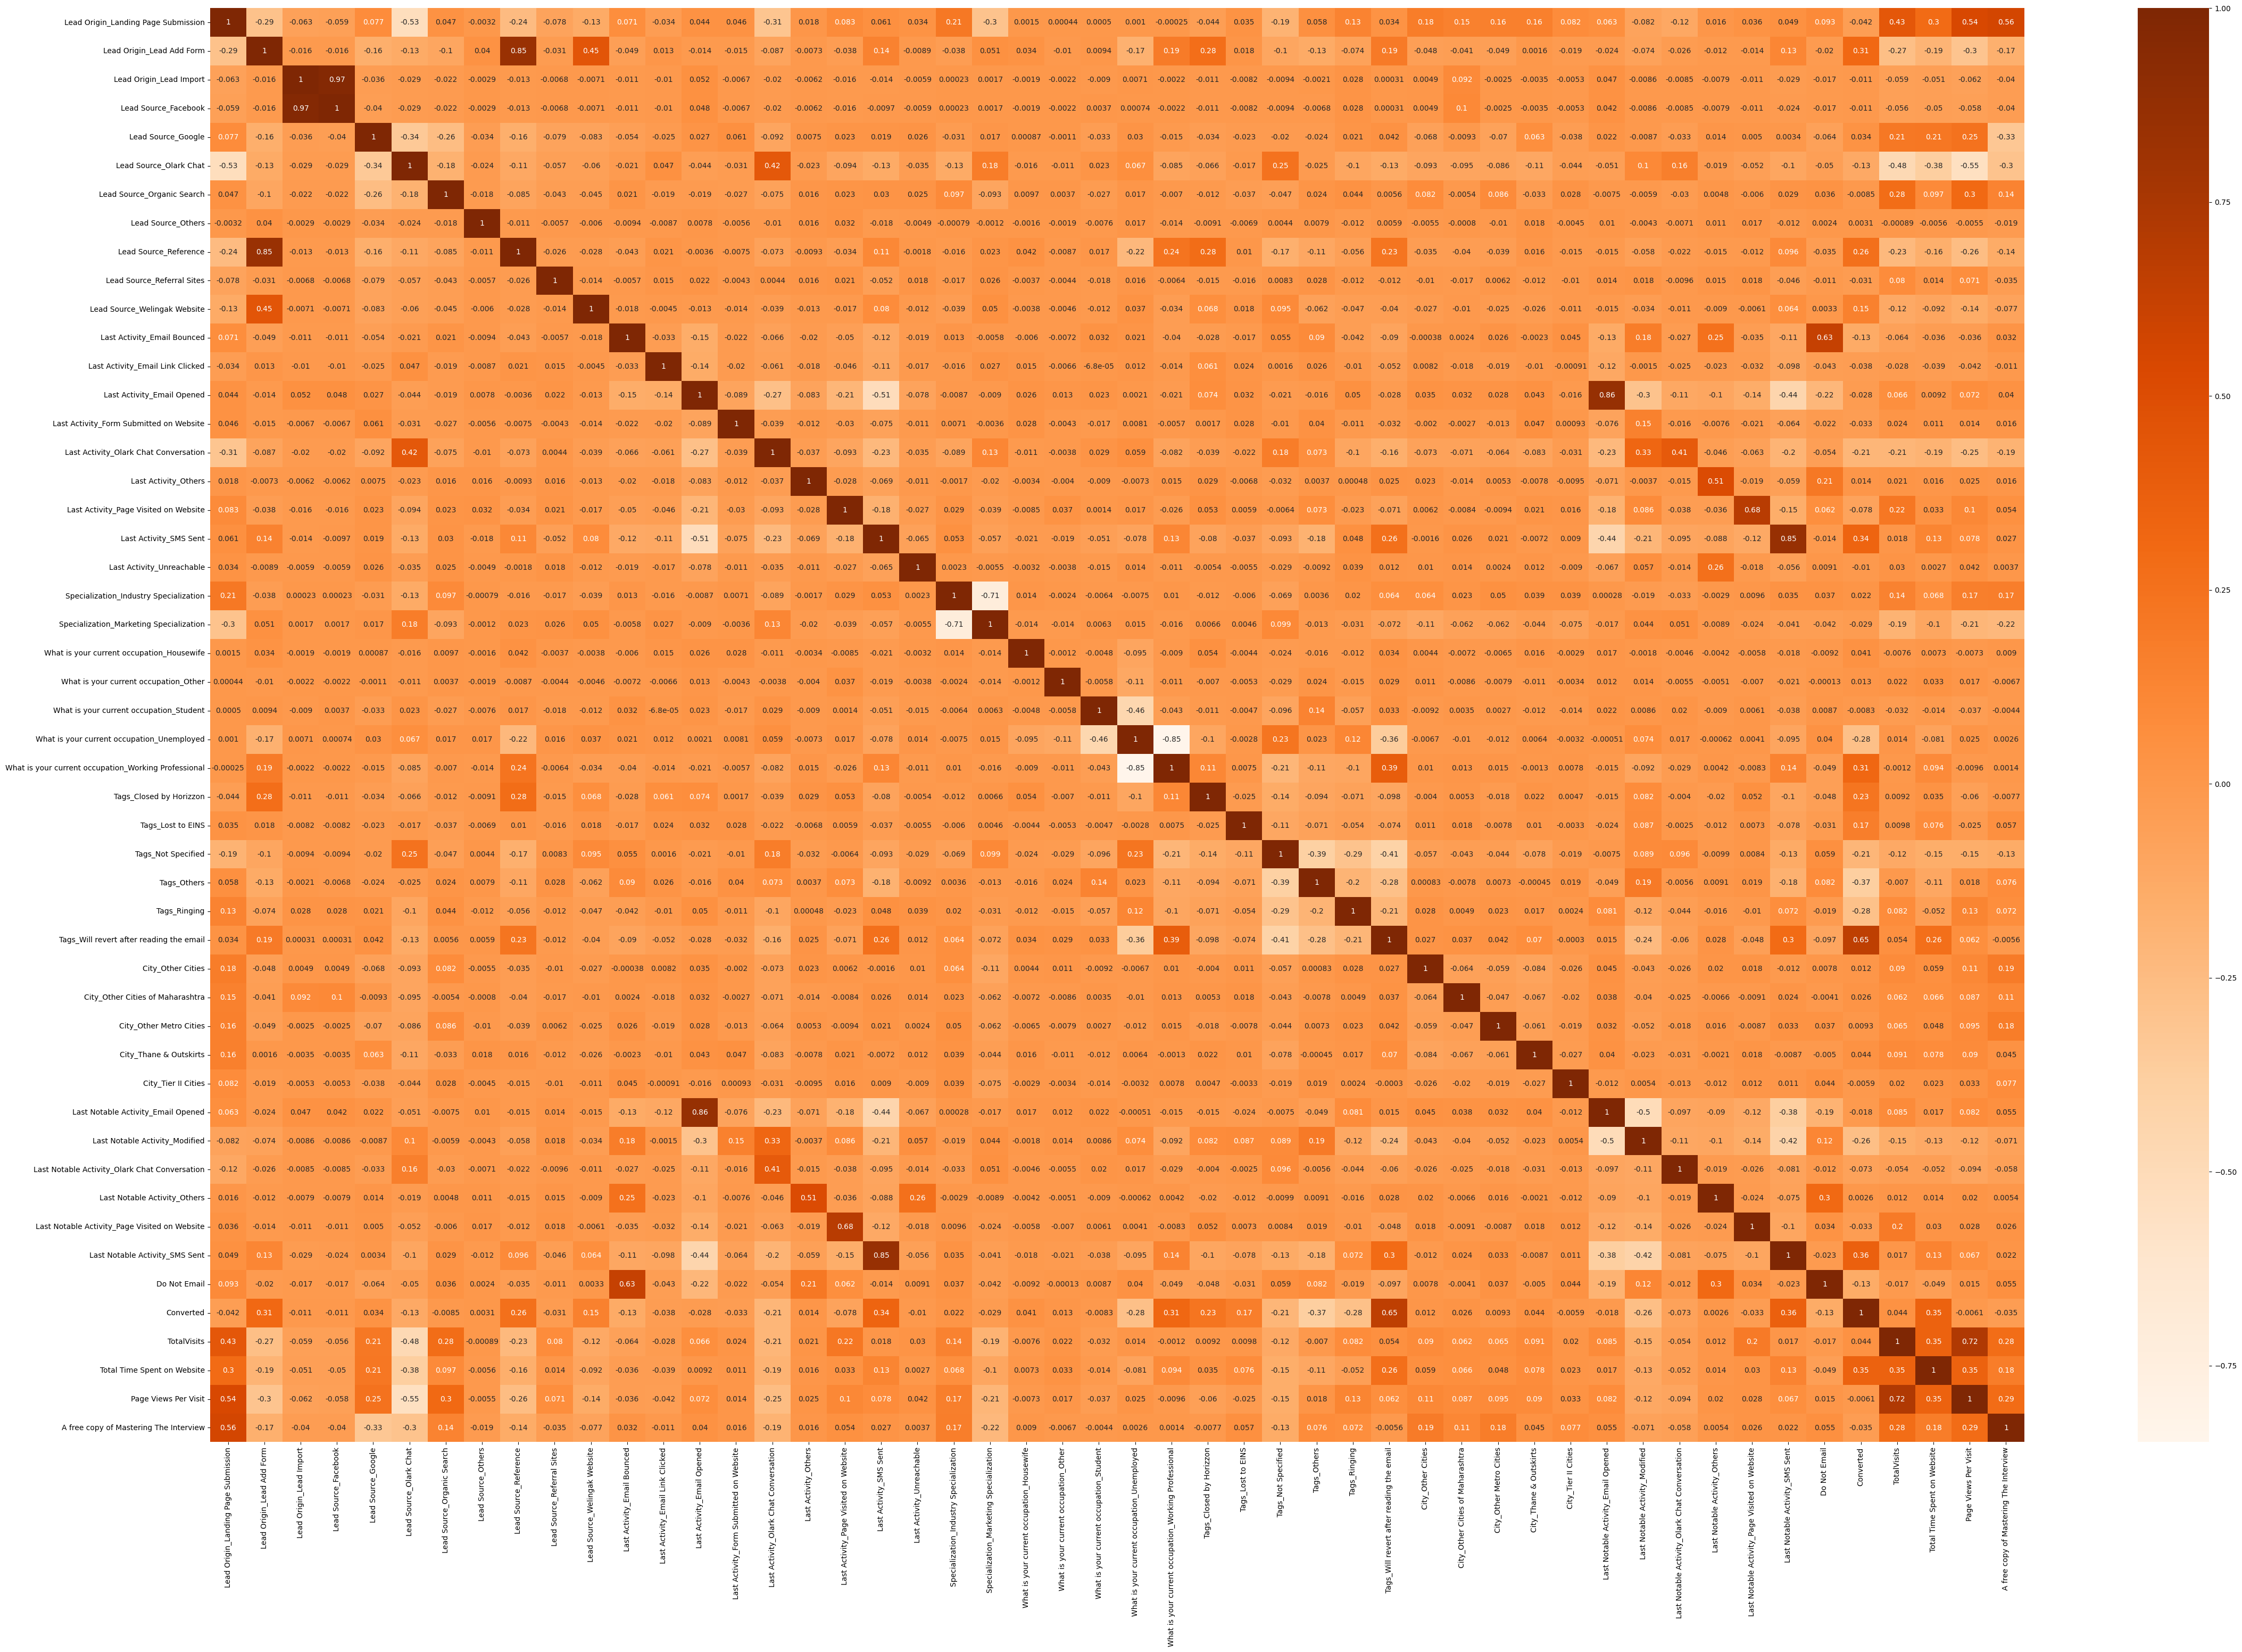

In [1528]:
plt.figure(figsize = (55, 35))
sns.heatmap(lead_df.corr(numeric_only=True), cmap='Oranges', annot=True)
plt.show()

In [1529]:
X_train.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Specialization_Industry Specialization',
       'Specialization_Marketing Specialization',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current

**Insights:** 

* 'Lead Origin_Lead Add Form' and 'Lead Source_Referance' having higher correlation of 0.85.
* 'TotalVisits' and 'Page Views Per Visit' having correlation of 0.72.
* 'Lead Source_Facebook' and 'Lead Origin_Lead Import' having higher correlation of 0.98.
* 'Lead Origin_Lead Add Form' ,'Lead Source_Welingak Website', 'Last Activity_SMS Sent' and 'What is
* your current Occupation_Working Professionals' having positive correlation with our target variable 'Converted'.

### MODEL BUILDING

In [1530]:
# Let's start model building using Stats Model and RFE

regressor = LogisticRegression()
rfe = RFE(regressor, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1531]:
rfe.support_

array([ True,  True, False, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False])

In [1532]:
# Checking the columns selected by RFE and their weightage
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 12),
 ('Lead Source_Facebook', False, 13),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Others', False, 23),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 17),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Form Submitted on Website', False, 15),
 ('Last Activity_Olark Chat Conversation', False, 21),
 ('Last Activity_Others', False, 32),
 ('Last Activity_Page Visited on Website', False, 35),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 20),
 ('Specialization_Industry Specialization', False, 24),
 ('Specialization_Marketing Specialization', False, 25),
 ('What is yo

In [1533]:
# Save the list of columns selected by RFE for further processing
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_SMS Sent',
       'Total Time Spent on Website'],
      dtype='object')

In [1534]:
# List of columns not selected 
X_train.columns[~rfe.support_]

Index(['Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Industry Specialization',
       'Specialization_Marketing Specialization',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'L

In [1535]:
# Creating utility function to build and fit the model

def build_model(dataframe):
    # Add constant
    X_train_sm = sm.add_constant(dataframe)
    
    # Build first fitted model
    log_model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    reg = log_model.fit()
    print("Logistic Regression Model is : \n", reg.summary())
    return reg

In [1536]:
# Creating utility function to check multicollinearity i.e Variance Inflation Factor

def calculate_vif(dataframe):
    vif = pd.DataFrame()
    vif['Features'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [1537]:
# Creating new dataframe to save the data for the features selected by RFE
X_train_rfe = X_train[rfe_cols]

In [1538]:
# Printing the shape of X_train_rfe
X_train_rfe.shape

(6267, 15)

In [1539]:
# Let's build Model 1 using the columns selected by RFE and also check VIF.

build_model(X_train_rfe)
print("\nCalculating VIF \n")
calculate_vif(X_train_rfe)

Logistic Regression Model is : 
                  Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1238.7
Date:                Mon, 22 Jul 2024   Deviance:                       2477.3
Time:                        13:08:26   Pearson chi2:                 9.11e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6086
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

,Features,VIF
1,Lead Origin_Lead Add Form,18.25
3,Lead Source_Reference,14.55
8,Tags_Not Specified,11.17
11,Tags_Will revert after reading the email,8.57
9,Tags_Others,8.23
10,Tags_Ringing,5.83
4,Lead Source_Welingak Website,4.76
5,Last Activity_SMS Sent,4.16
13,Last Notable Activity_SMS Sent,3.97
6,Tags_Closed by Horizzon,2.63


In [1540]:
# drop Lead Source_Reference high p value 0.250
X_train_rfe.drop(columns=['Lead Source_Reference'], axis=1, inplace=True)

In [1541]:
X_train_rfe.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_SMS Sent,Total Time Spent on Website
3385,0.937636,-0.280790,-0.489155,-0.121386,-0.653883,-0.187572,-0.13972,1.313761,-0.508612,-0.382808,-0.537071,-0.673339,-0.561194,-0.352398
2273,-1.066512,3.561377,-0.489155,-0.121386,1.529326,5.331279,-0.13972,-0.761173,-0.508612,-0.382808,-0.537071,-0.673339,-0.561194,-0.882395
4234,0.937636,-0.280790,-0.489155,-0.121386,1.529326,-0.187572,-0.13972,1.313761,-0.508612,-0.382808,-0.537071,-0.673339,1.781914,-0.678832
945,-1.066512,-0.280790,-0.489155,-0.121386,-0.653883,-0.187572,-0.13972,-0.761173,-0.508612,2.612273,-0.537071,-0.673339,-0.561194,-0.121327
8689,-1.066512,-0.280790,2.044343,-0.121386,-0.653883,-0.187572,-0.13972,-0.761173,1.966134,-0.382808,-0.537071,1.485135,-0.561194,-0.882395


In [1542]:
build_model(X_train_rfe)
print("\nCalculating VIF \n")
calculate_vif(X_train_rfe)

Logistic Regression Model is : 
                  Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1239.4
Date:                Mon, 22 Jul 2024   Deviance:                       2478.8
Time:                        13:08:26   Pearson chi2:                 9.25e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6085
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

,Features,VIF
7,Tags_Not Specified,11.17
10,Tags_Will revert after reading the email,8.57
8,Tags_Others,8.23
9,Tags_Ringing,5.83
4,Last Activity_SMS Sent,4.16
12,Last Notable Activity_SMS Sent,3.97
5,Tags_Closed by Horizzon,2.62
1,Lead Origin_Lead Add Form,1.97
6,Tags_Lost to EINS,1.85
2,Lead Source_Olark Chat,1.83


In [1543]:
#all p-values are significant now, let's start elimiating the  featies based on hogh values of vif
# drop Tags_Not Specified high vif value of 11.17
X_train_rfe.drop(columns=['Tags_Not Specified'], axis=1, inplace=True)

In [1544]:
X_train_rfe.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_SMS Sent,Total Time Spent on Website
3385,0.937636,-0.280790,-0.489155,-0.121386,-0.653883,-0.187572,-0.13972,-0.508612,-0.382808,-0.537071,-0.673339,-0.561194,-0.352398
2273,-1.066512,3.561377,-0.489155,-0.121386,1.529326,5.331279,-0.13972,-0.508612,-0.382808,-0.537071,-0.673339,-0.561194,-0.882395
4234,0.937636,-0.280790,-0.489155,-0.121386,1.529326,-0.187572,-0.13972,-0.508612,-0.382808,-0.537071,-0.673339,1.781914,-0.678832
945,-1.066512,-0.280790,-0.489155,-0.121386,-0.653883,-0.187572,-0.13972,-0.508612,2.612273,-0.537071,-0.673339,-0.561194,-0.121327
8689,-1.066512,-0.280790,2.044343,-0.121386,-0.653883,-0.187572,-0.13972,1.966134,-0.382808,-0.537071,1.485135,-0.561194,-0.882395


In [1545]:
build_model(X_train_rfe)
print("\nCalculating VIF \n")
calculate_vif(X_train_rfe)

Logistic Regression Model is : 
                  Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1246.6
Date:                Mon, 22 Jul 2024   Deviance:                       2493.3
Time:                        13:08:26   Pearson chi2:                 9.35e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6076
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------

,Features,VIF
4,Last Activity_SMS Sent,4.16
11,Last Notable Activity_SMS Sent,3.96
1,Lead Origin_Lead Add Form,1.97
2,Lead Source_Olark Chat,1.83
0,Lead Origin_Landing Page Submission,1.73
9,Tags_Will revert after reading the email,1.57
12,Total Time Spent on Website,1.47
10,Last Notable Activity_Email Opened,1.33
3,Lead Source_Welingak Website,1.29
7,Tags_Others,1.29


# all p and vif vales are in range

#Let's predict and check the evaluation metricsS

**Inference**:
We can select **Model 7** as the final Liner Regression Model because of the below reasons:
* The p-values for all features is either 0 or less than 0.05
* The value of VIF is in accepted range, i.e all values are less than 5.
* The values of R-squared, Adj. R-squared, F-statistic are all high.
* The difference between R-Squared and Adj. R-squared is very less which means that there are no additional features that can be removed from the model to make it more stable.

### Making predictions

In [1546]:
# Calculating predicted values of 'y_train':-

y_train_pred = reg.predict(X_train_sm)
y_train_pred[:10]
                            

3385    0.026062
2273    0.998315
4234    0.366984
945     0.002646
8689    0.023813
3142    0.064497
6033    0.018716
2350    0.004958
3490    0.001056
5066    0.008255
dtype: float64

In [1547]:
# Reshaping :-

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02606199, 0.99831544, 0.36698372, 0.00264558, 0.02381314,
       0.06449712, 0.01871586, 0.00495788, 0.00105574, 0.00825539])

In [1548]:
## Creating dataframe 'y_train_pred_final' with actual and predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Adding column 'Prospect ID'
y_train_pred_final['Prospect ID'] = y_train.index

# Displaying head of created dataframe
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.026062,3385
1,1,0.998315,2273
2,0,0.366984,4234
3,0,0.002646,945
4,0,0.023813,8689


In [1549]:
#

# y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# y_train_pred_final.head(10)

### Finding Optimal Cutoff Point
Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [1550]:
# Let's create columns with different probability cutoffs :-
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.026062,3385,1,0,0,0,0,0,0,0,0,0
1,1,0.998315,2273,1,1,1,1,1,1,1,1,1,1
2,0,0.366984,4234,1,1,1,1,0,0,0,0,0,0
3,0,0.002646,945,1,0,0,0,0,0,0,0,0,0
4,0,0.023813,8689,1,0,0,0,0,0,0,0,0,0


In [1551]:
# Let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])



# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] = [i,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385352     1.000000     0.000000
0.1          0.1  0.855433     0.971429     0.782710
0.2          0.2  0.895165     0.944928     0.863967
0.3          0.3  0.920696     0.911801     0.926272
0.4          0.4  0.926281     0.895238     0.945742
0.5          0.5  0.927238     0.880745     0.956386
0.6          0.6  0.926440     0.863768     0.965732
0.7          0.7  0.912239     0.808696     0.977155
0.8          0.8  0.906335     0.783437     0.983385
0.9          0.9  0.886708     0.720497     0.990914


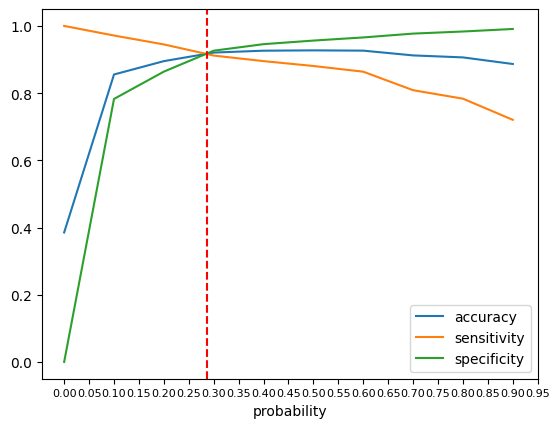

In [1556]:
# Plotting accuracy, sensitivity and specificity for various probabilities:-

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.286, color='r', linestyle='--')

plt.show()

**Insights:**
* From the above curve, we can see that 0.286 is optimal cutoff point that we can take for calculating the final predicted values.


In [1553]:
# Calculating 'final_predicted' using 0.286 as the cutoff point

y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.286 else 0)

In [1554]:
y_train_pred_final.head() 

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.026062,3385,1,0,0,0,0,0,0,0,0,0,0
1,1,0.998315,2273,1,1,1,1,1,1,1,1,1,1,1
2,0,0.366984,4234,1,1,1,1,0,0,0,0,0,0,1
3,0,0.002646,945,1,0,0,0,0,0,0,0,0,0,0
4,0,0.023813,8689,1,0,0,0,0,0,0,0,0,0,0


In [1557]:
#Let's delete the redundant probability columns
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], axis = 1, inplace = True)

In [1558]:
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Final_Predicted
0,0,0.026062,3385,0
1,1,0.998315,2273,1
2,0,0.366984,4234,1
3,0,0.002646,945,0
4,0,0.023813,8689,0


In [1559]:
# Creating a new column 'Lead Score' and assigning values based on 'Converted_Prob' 
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [1560]:
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Final_Predicted,Lead_Score
0,0,0.026062,3385,0,3
1,1,0.998315,2273,1,100
2,0,0.366984,4234,1,37
3,0,0.002646,945,0,0
4,0,0.023813,8689,0,2
